# Library Usage in Seattle, 2005-2020

## Exploratory Data Analysis

The data that is the basis for this project is the [Checkouts by Title (Physical Items)](https://data.seattle.gov/Community/Checkouts-By-Title-Physical-Items-/5src-czff) dataset from [Seattle Open Data](https://data.seattle.gov/). It was downloaded on December 15, 2020.

This notebook uses two datasets that were created in the [previous notebook](01_data_cleaning.ipynb), which I use to explore and analyze the types of items and the quantities of those items that were checked out from the Seattle Library system between 2005 and 2020.

## Table of contents

1. [Import required packages](#Import-required-packages)
2. [Load data](#Load-data)
3. [Counts across categories](#Counts-across-categories)
    - [Format group](#Analysis-of-format_group)
    - [Format subgroup](#Analysis-of-format_subgroup)
    - [Category group](#Analysis-of-category_group)
    - [Age group](#Analysis-of-age_group)


4. [Most popular items](#Most-popular-items)
    - [Books](#Books)
    - [Music](#Music)
    - [Equipment](#Equipment)
    - [Other](#Other)
    
    
5. [Checkouts over time](#Checkouts-over-time)
    - [Check for missing values](#Check-for-missing-values)
    - [Investigate missing values](#Investigate-missing-values)
        - [Missing values by year](#Missing-values-by-year)
        - [Missing values by day of week](#Missing-values-by-day-of-week)
        - [Missing values by day of week and year](#Missing-values-by-day-of-week-and-year)
    - [Day of the week](#Day-of-the-week)
    - [2005-2020, overall](#2005-2020,-overall)
    - [2005-2020, yearly](#2005-2020,-yearly)
    - [Equipment](#Equipment)
    - [Print vs. Media](#Print-vs.-Media)
    

### Import required packages

In [1]:
# standard dataframe packages
import pandas as pd; pd.set_option('display.max_columns', 50)
import numpy as np

# graphing packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style('ticks')

import datetime

# custom functions
from functions.data_cleaning import *

# reload functions/libraries when edited
%load_ext autoreload
%autoreload 2

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Load data

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

I'll load both the complete item checkouts data, as well as the item counts data, here. Again, these were created in the [previous notebook](01_data_cleaning.ipynb).

#### ⏰ Cell below takes 20-25 minutes to run. ⏰

In [2]:
%%time

# uncomment to load complete item checkouts data
df_full = load_multi_df(
    'data/', 'seattle_lib_', 'pkl', 11, compression='gzip', verbose=1
)

Current time = 14:01:51
-----------------------
Begin load...

Current time = 14:23:22
-----------------------
Load complete!

CPU times: user 3min 37s, sys: 9min 57s, total: 13min 35s
Wall time: 21min 39s


In [3]:
# take a look
df_full.head()

title  \
0                                   Firewall   
1                                  Marley me   
2  Six feet under The complete fourth season   
3                 Doctor Who The next doctor   
4                                School ties   

                                            subjects        date format_group  \
0  Kidnapping Drama, Video recordings for the hea...  2008-02-13        Media   
1  Comedy films, Married people Drama, Philadelph...  2009-07-03        Media   
2  Video recordings for the hearing impaired, Pro...  2008-10-26        Media   
3  London England Drama, Doctor Who Fictitious ch...  2010-11-10        Media   
4  Antisemitism Drama, Video recordings for the h...  2008-12-28        Media   

  format_subgroup category_group age_group  
0      Video Disc        Fiction     Adult  
1      Video Disc        Fiction     Adult  
2      Video Disc        Fiction     Adult  
3      Video Disc        Fiction     Adult  
4      Video Disc        Fiction     Adult

In [205]:
# uncomment to load item counts data
df_counts = pd.read_pickle('data/seattle_lib_counts.pkl', compression='gzip')

In [206]:
# convert index to proper format
df_counts.index = pd.DatetimeIndex(df_counts.index)

In [197]:
# check shape
df_counts.shape

(5470, 31)

In [196]:
# take a look
df_counts.head()

total_checkouts  missing_title  missing_subjects  \
date                                                           
2005-04-13            16471            212               664   
2005-04-14            10358            123               541   
2005-04-15            12896            179               508   
2005-04-16             1358              7                56   
2005-04-17             4555             80               232   

            format_group_Equipment  format_group_Media  format_group_Other  \
date                                                                         
2005-04-13                     1.0              6397.0                32.0   
2005-04-14                     1.0              4015.0                75.0   
2005-04-15                     0.0              5351.0                51.0   
2005-04-16                     0.0               552.0                 0.0   
2005-04-17                     0.0              1555.0                 8.0   

            format_group_Print  format_subgroup_Art  \
date                                                  
2005-04-13             10041.0                  0.0   
2005-04-14              6267.0                  0.0   
2005-04-15              7494.0                  0.0   
2005-04-16               806.0                  0.0   
2005-04-17              2992.0                  0.0   

            format_subgroup_Audio Disc  format_subgroup_Audio Tape  \
date                                                                 
2005-04-13                      1874.0                        63.0   
2005-04-14                      1245.0                        31.0   
2005-04-15                      1462.0                        54.0   
2005-04-16                       175.0                         8.0   
2005-04-17                       499.0                        10.0   

            format_subgroup_Audiobook Disc  format_subgroup_Audiobook Tape  \
date                                                                         
2005-04-13                           217.0                           308.0   
2005-04-14                           164.0                           156.0   
2005-04-15                           187.0                           239.0   
2005-04-16                            31.0                            23.0   
2005-04-17                            47.0                            96.0   

            format_subgroup_Book  format_subgroup_Data Disc  \
date                                                          
2005-04-13                9970.0                       10.0   
2005-04-14                6225.0                        7.0   
2005-04-15                7452.0                       12.0   
2005-04-16                 802.0                        1.0   
2005-04-17                2946.0                        9.0   

            format_subgroup_Document  format_subgroup_Film  \
date                                                         
2005-04-13                       0.0                   0.0   
2005-04-14                       0.0                   0.0   
2005-04-15                       0.0                   0.0   
2005-04-16                       0.0                   0.0   
2005-04-17                       0.0                   0.0   

            format_subgroup_Folder  format_subgroup_Kit  \
date                                                      
2005-04-13                     8.0                 97.0   
2005-04-14                     8.0                 85.0   
2005-04-15                     4.0                 80.0   
2005-04-16                     2.0                  9.0   
2005-04-17                     7.0                 19.0   

            format_subgroup_Music Score  format_subgroup_Periodical  \
date                                                                  
2005-04-13                         40.0                         0.0   
2005-04-14                         28.0                         0.0   
2005-04-15       

## Counts across categories

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

In this section, I'll compare the number of checkouts across the various groups within the following columns:
- `format_group`
- `format_subgroup`
- `category_group`
- `age_group`

### Analysis of `format_group`

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

In [7]:
# raw counts
col_counts = df_full.format_group.value_counts()
col_counts

Print        59615970
Media        46618209
Other          200453
Equipment       69211
Name: format_group, dtype: int64

In [8]:
# as a percentage of the data
df_full.format_group.value_counts(normalize=True) * 100

Print        55.975417
Media        43.771387
Other         0.188212
Equipment     0.064985
Name: format_group, dtype: float64

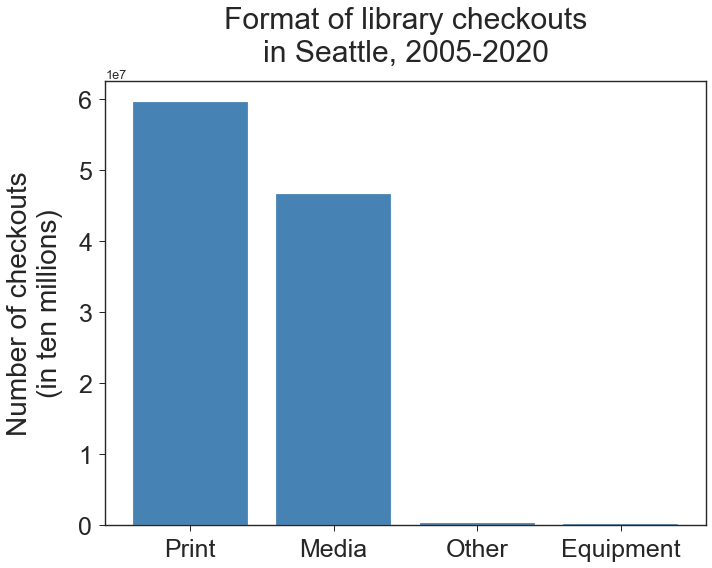

In [9]:
# create labels and prettify the plot
plt.figure(figsize=(10,8))
plt.title('Format of library checkouts\nin Seattle, 2005-2020', 
          fontsize=30, pad=20)
plt.suptitle('')
# plt.xlabel('Format', fontsize=28, labelpad=15)
plt.ylabel('Number of checkouts\n(in ten millions)', fontsize=28, labelpad=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# plot counts
plt.bar(col_counts.index, col_counts.values, color='steelblue')

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/format_group_counts.png', 
            bbox_inches='tight', transparent=True)

plt.show()

### Analysis of `format_subgroup`

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

In [10]:
# raw counts
col_counts = df_full.format_subgroup.value_counts()
col_counts

Book              59417481
Video Disc        30287406
Audio Disc        11238813
Audiobook Disc     2695078
Video Tape         1474457
Kit                 695201
Audiobook Tape      240328
Music Score         130486
Audio Tape           45946
Folder               23900
Data Disc             9886
Periodical             623
Document               471
Art                    129
Film                    81
Name: format_subgroup, dtype: int64

In [11]:
# as a percentage of the data
df_full.format_subgroup.value_counts(normalize=True) * 100

Book              55.916922
Video Disc        28.503035
Audio Disc        10.576682
Audiobook Disc     2.536298
Video Tape         1.387590
Kit                0.654243
Audiobook Tape     0.226169
Music Score        0.122798
Audio Tape         0.043239
Folder             0.022492
Data Disc          0.009304
Periodical         0.000586
Document           0.000443
Art                0.000121
Film               0.000076
Name: format_subgroup, dtype: float64

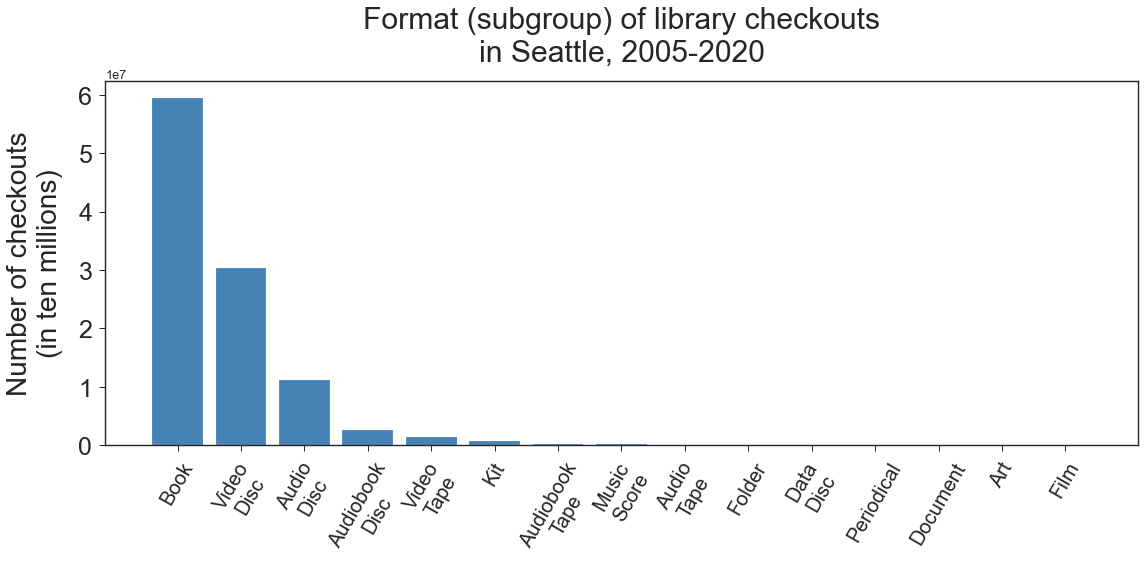

In [12]:
# create labels and prettify the plot
plt.figure(figsize=(16,8))
plt.title('Format (subgroup) of library checkouts\nin Seattle, 2005-2020', 
          fontsize=30, pad=20)
# plt.xlabel('Format', fontsize=28, labelpad=15)
plt.ylabel('Number of checkouts\n(in ten millions)', fontsize=28, labelpad=15)
plt.yticks(fontsize=25)

# prettify the x tick labels
labels_pretty = [label.replace(' ', '\n') for label in list(col_counts.index)]
plt.xticks(ticks=range(len(col_counts)), labels=labels_pretty, fontsize=20, rotation=60)

# plot counts
plt.bar(col_counts.index, col_counts.values, color='steelblue')

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/format_subgroup_counts.png', 
            bbox_inches='tight', transparent=True)

plt.show()

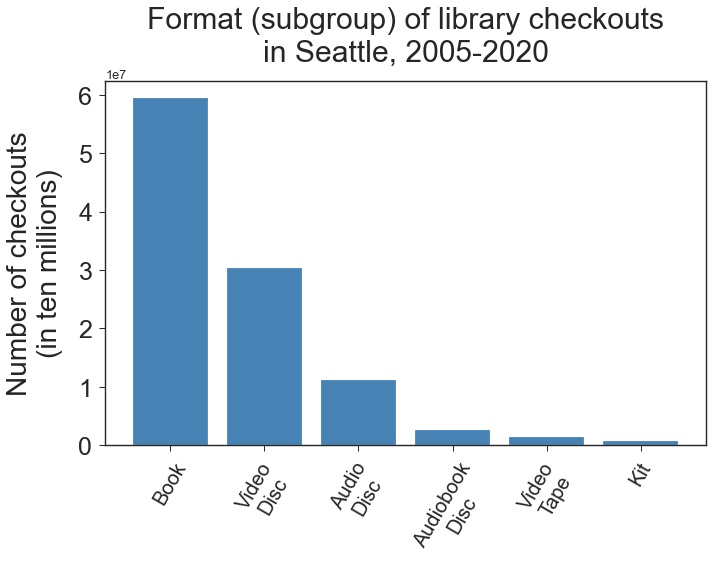

In [13]:
# top 6
col_counts = df_full['format_subgroup'].value_counts().head(6)

# create labels and prettify the plot
plt.figure(figsize=(10,8))
plt.title('Format (subgroup) of library checkouts\nin Seattle, 2005-2020', 
          fontsize=30, pad=20)
# plt.xlabel('Format', fontsize=28, labelpad=15)
plt.ylabel('Number of checkouts\n(in ten millions)', fontsize=28, labelpad=15)
plt.yticks(fontsize=25)

# prettify the x tick labels
labels_pretty = [label.replace(' ', '\n') for label in list(col_counts.index)]
plt.xticks(ticks=range(len(col_counts)), labels=labels_pretty, fontsize=20, rotation=60)

# plot counts
plt.bar(col_counts.index, col_counts.values, color='steelblue')

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/format_subgroup_counts_top6.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- Unsurprisingly, books make up the majority of physical items checked out at Seattle libraries, followed by movies and CDs.
- I would have guessed that audiobooks made up a larger portion of checkouts, but they only account for about 2.5% of the data.

### Analysis of `category_group`

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

In [14]:
# raw counts
col_counts = df_full.category_group.value_counts()
col_counts

Fiction              65292861
Nonfiction           37539002
Other                 1741770
Language              1679452
Interlibrary Loan      192959
Reference               57420
Name: category_group, dtype: int64

In [15]:
# as a percentage of the data
df_full.category_group.value_counts(normalize=True) * 100

Fiction              61.305857
Nonfiction           35.246743
Other                 1.635412
Language              1.576899
Interlibrary Loan     0.181176
Reference             0.053914
Name: category_group, dtype: float64

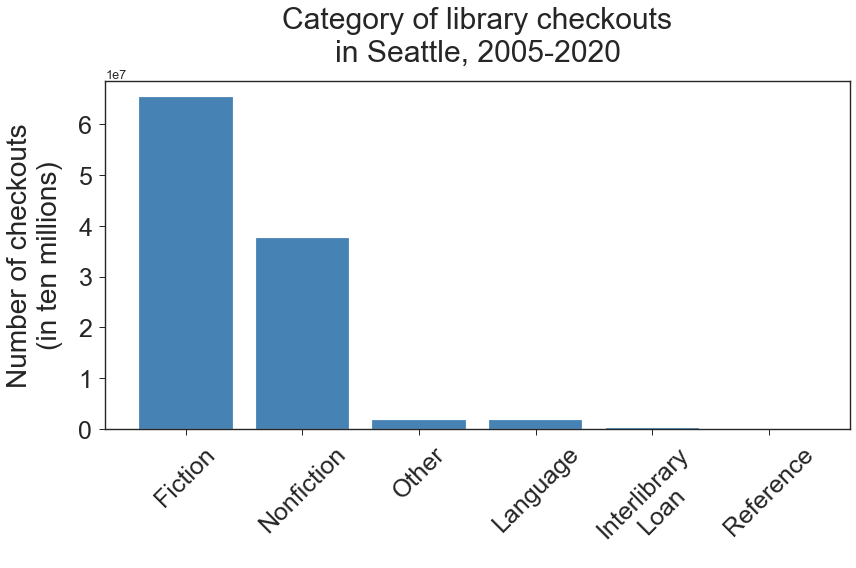

In [16]:
# prettify the plot
plt.figure(figsize=(12,8))
plt.title('Category of library checkouts\nin Seattle, 2005-2020', 
          fontsize=30, pad=20)
# plt.xlabel('Category', fontsize=28, labelpad=15)
plt.ylabel('Number of checkouts\n(in ten millions)', fontsize=28, labelpad=15)
plt.yticks(fontsize=25)

# prettify the x tick labels
labels_pretty = [label.replace(' ', '\n') for label in list(col_counts.index)]
plt.xticks(ticks=range(6), labels=labels_pretty, fontsize=25, rotation=45)

# plot counts
plt.bar(col_counts.index, col_counts.values, color='steelblue')

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/category_group_counts.png', 
            bbox_inches='tight', transparent=True)

plt.show()

### Analysis of `age_group`

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

In [17]:
# raw counts
col_counts = df_full.age_group.value_counts()
col_counts

Adult       71587854
Juvenile    31006173
Teen         3909816
Name: age_group, dtype: int64

In [18]:
# as a percentage of the data
df_full.age_group.value_counts(normalize=True) * 100

Adult       67.216217
Juvenile    29.112727
Teen         3.671056
Name: age_group, dtype: float64

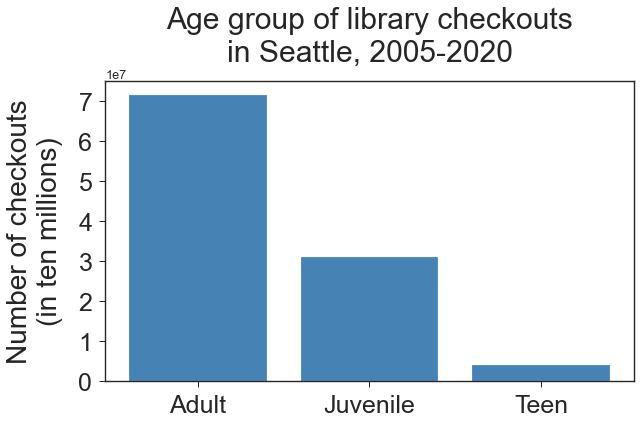

In [19]:
# prettify the plot
plt.figure(figsize=(9,6))
plt.title('Age group of library checkouts\nin Seattle, 2005-2020', 
          fontsize=30, pad=20)
plt.ylabel('Number of checkouts\n(in ten millions)', fontsize=28, labelpad=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# plot counts
plt.bar(col_counts.index, col_counts.values, color='steelblue')

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/age_group_counts.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- Two-thirds of checkouts are of `Adult` items, about one-third are `Juvenile` or kid's items.
- `Teen` items make up less than 4% of the data, which makes sense, given that `Teen` is such a specific age group with a fairly small range.
    - Is there a chance that teenagers think libraries are uncool? Impossible to tell with this data.

## Most popular items

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

In [20]:
%%time

# top 50 stats
df_full.title.value_counts().head(50)

CPU times: user 48.9 s, sys: 26.8 s, total: 1min 15s
Wall time: 1min 31s


Greatest hits                                73907
SPL HotSpot connecting Seattle               34217
Into the wild                                25151
Uncataloged Folder or Bag BAL                22608
Uncataloged Folder or Bag DWN                22504
Harry Potter and the half blood prince       22389
Twilight                                     21363
Where the wild things are                    21359
kite runner                                  20864
golden compass                               20861
Harry Potter and the sorcerers stone         19867
No country for old men                       19784
FlexTech Laptops                             19577
Cinderella                                   19566
Harry Potter and the Order of the Phoenix    19063
reader                                       18933
hunger games                                 17707
Atonement                                    17476
Harry Potter and the goblet of fire          17446
Uncataloged Folder or Bag GWD  

Perhaps unsurprisingly, the top 50 titles are mostly comprised of items that are both books and movies, as well as more generic terms such as `Greatest hits`; thus, I will have to perform a closer look at each format type and some specific items.

#### Important notes:
- Equipment plays a large role in Seattle's libraries, namely `SPL HotSpot connecting Seattle`, `FlexTech Laptops`, and `In Building Device Checkout`
    - Perhaps analyzing this across time can lead to further insights
    - Libraries play a large role in folks accessing the internet
- Several items are marked as `Uncataloged Folder or Bag`, followed by the code for whichever branch they are a part of; perhaps more investigation will be necessary here
- `Michael Clayton` appears to be the top item for items that are only either a book or a movie, not both
    - Followed by `Burn After Reading` and `Darjeeling Limited`
- All but the final `Harry Potter` book/movie appear on the list, which may be due to the fact that:
    - as a book, it came out in July 2007 (after the start date of this data)
    - as a movie, and perhaps more importantly as far as this data is concerned, it is actually split into *two* movies, unlike the other books/movies in the series
    
    
### Books

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

#### Top 25 Books Overall

#### ⏰ Cell below takes ~3 minutes to run. ⏰

In [21]:
%%time

# top 25 stats
top25_books = df_full[df_full.format_subgroup == 'Book'].title.value_counts().head(25)

# take a look
top25_books

CPU times: user 36.1 s, sys: 1min 8s, total: 1min 44s
Wall time: 2min 40s


Dinosaurs                                 11210
Educated a memoir                         10958
Where the wild things are                 10623
Green eggs and ham                         9937
very hungry caterpillar                    9927
Are you ready to play outside              9822
Whered you go Bernadette a novel           9600
Snow                                       9581
Chicka chicka boom boom                    9568
There is a bird on your head               9453
cat in the hat                             9246
Harry Potter and the half blood prince     9229
Go dog go                                  9194
My friend is sad                           9128
Pigs make me sneeze                        9103
Today I will fly                           8997
Goldilocks and the three bears             8945
Bob books fun                              8912
I love my new toy                          8846
Giggle giggle quack                        8804
Frog and Toad are friends               

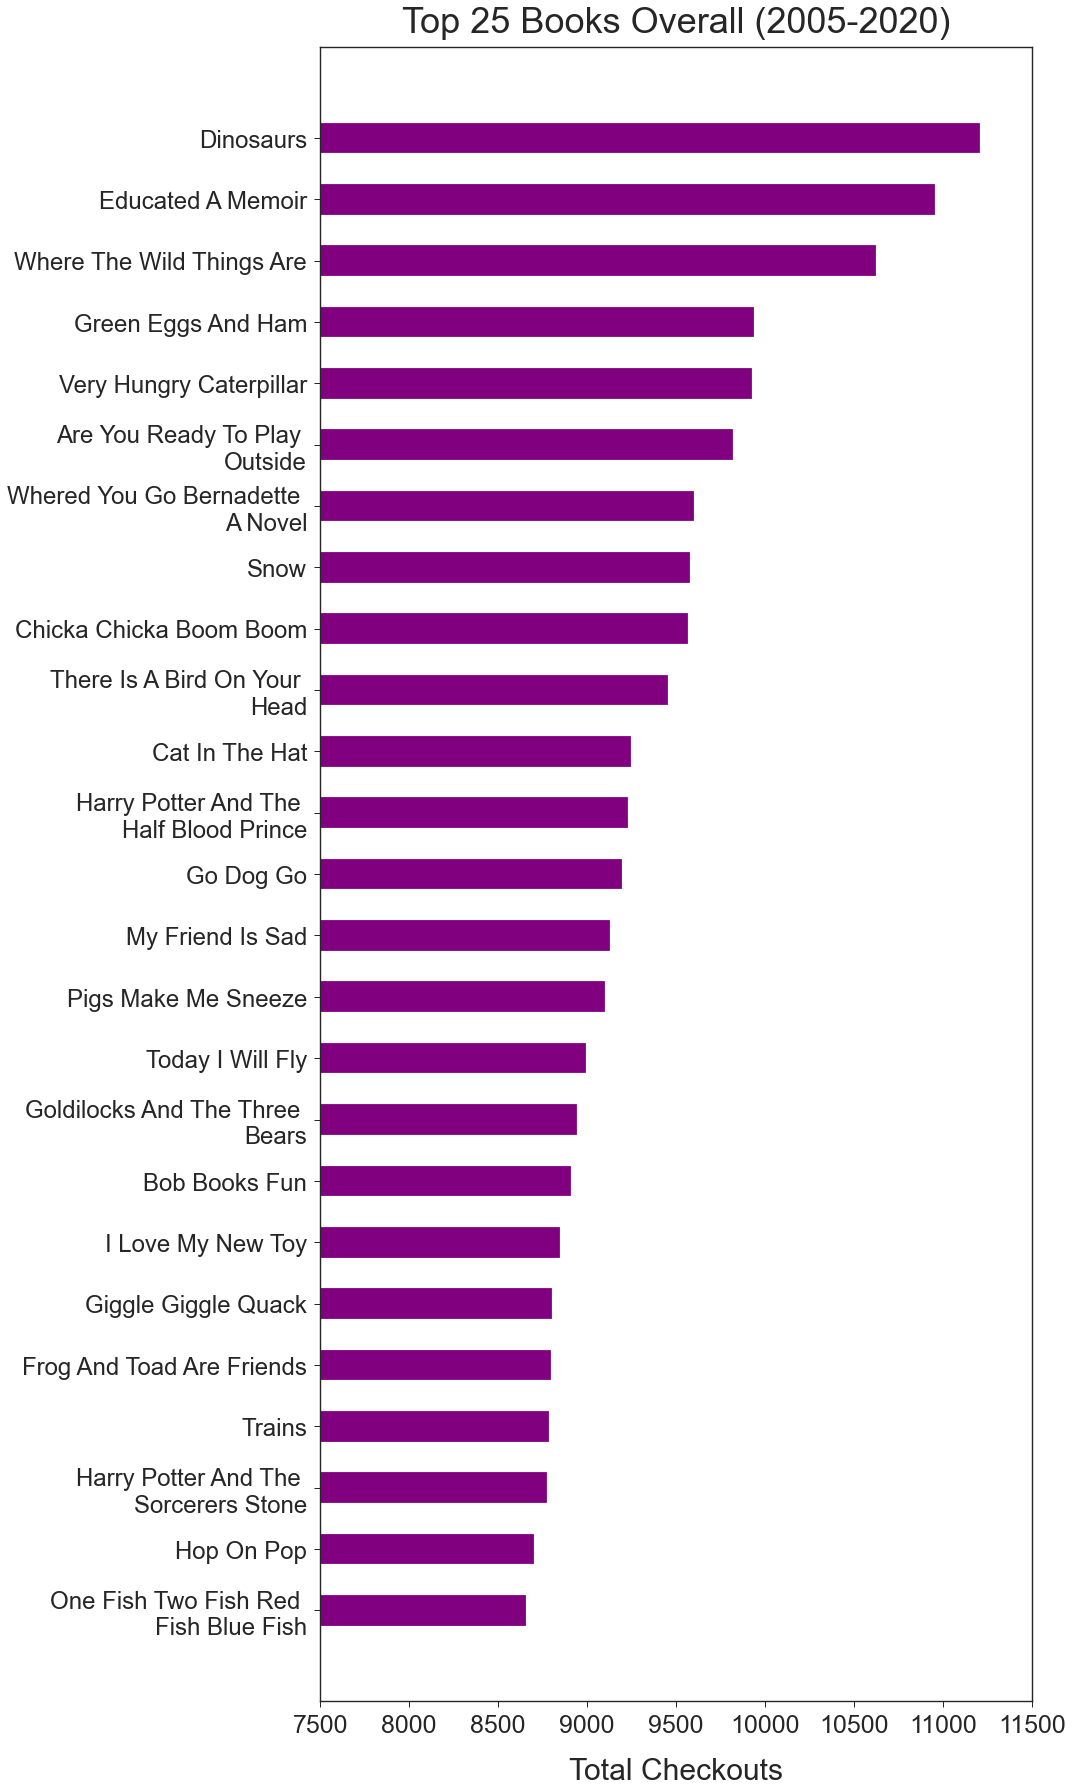

In [22]:
# create labels and prettify the plot
plt.figure(figsize=(15,25))
plt.title('Top 25 Books Overall (2005-2020)', fontsize=36, pad=15)
plt.xlabel('Total Checkouts', fontsize=30, labelpad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=24)
plt.xlim(left=7500, right=11500)

# plot top 25 books
plt.barh([name_beautifier(x) for x in top25_books.index][::-1], top25_books.values[::-1], color='purple', height=0.5)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/top25_books_hbar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- Other than `Educated` and `Where'd you go, Bernadette?`, all of these books are in the `Juvenile` age group, i.e. children's books.
    - While this does point to the fact that libraries are integral resources for young readers, it may also suggest that there are simply fewer (and possibly less diverse) options among `Juvenile` books.
    - By the time readers reach a certain age, they presumably have a wide variety of interests as well as many more books to choose from, so library activity gets spread out among a larger population of books.

- Simply put, this does not prove anything about who uses the library the most, but merely which items see the most activity. It is also worth pointing out that many of these can be read in a day, which increases turnover or the ability to change hands quickly and be checked out often.

- I'll now break this down by age group and fiction/nonfiction books.

#### Top 25 Books - Adult

In [23]:
%%time

# top 25 stats
top25_books_adult = df_full[(df_full.format_subgroup == 'Book') &
                            (df_full.age_group == 'Adult')].title.value_counts().head(25)

# take a look
top25_books_adult

CPU times: user 13.8 s, sys: 17.2 s, total: 31 s
Wall time: 38.3 s


Educated a memoir                                                                            10958
Whered you go Bernadette a novel                                                              9600
Where the crawdads sing                                                                       8652
Becoming                                                                                      8410
omnivores dilemma a natural history of four meals                                             7758
help                                                                                          7675
All the light we cannot see a novel                                                           7617
Gone girl a novel                                                                             7496
girl with the dragon tattoo                                                                   7402
Quiet the power of introverts in a world that cant stop talking                               7361
Never let 

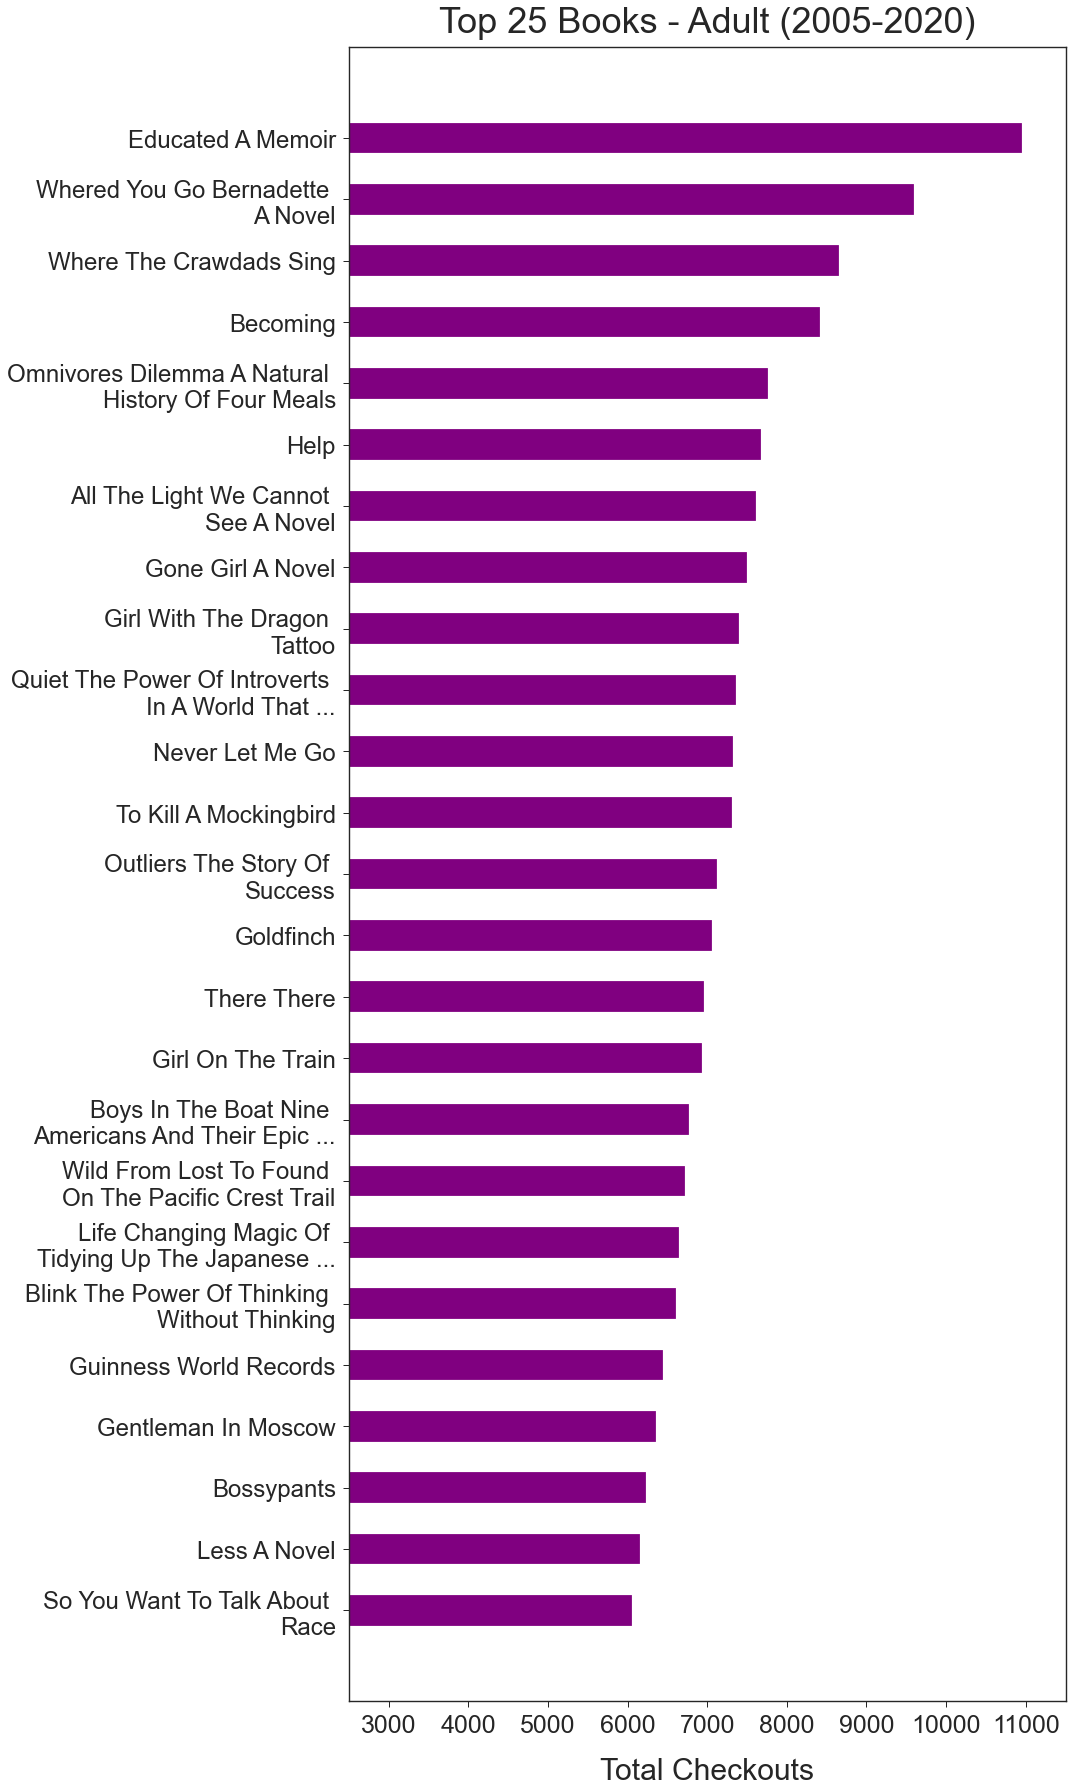

In [24]:
# create labels and prettify the plot
plt.figure(figsize=(15,25))
plt.title('Top 25 Books - Adult (2005-2020)', fontsize=36, pad=15)
plt.xlabel('Total Checkouts', fontsize=30, labelpad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=24)
plt.xlim(left=2500, right=11500)

# plot top 25 adult books
plt.barh([name_beautifier(x) for x in top25_books_adult.index][::-1],
         top25_books_adult.values[::-1], color='purple', height=0.5)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/top25_books_adult_hbar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- 7 out of the top 10 are female authors.
    - 14 out of 25 female authors, 10 out of 25 male authors, and 1 anthology (`Guinness Book of World Records`).
    - Again, it is impossible to determine whether this means females are more active than males at the library, for a variety of reasons, not least of which is that the gender of the author does not directly correlate with the the gender of the reader.
- Malcolm Gladwell appears on here twice, the only author to do so (`Outliers` and `Blink`).
- I'd like to further break this down into fiction and nonfiction. It appears that both are fairly well represented in this list:
    - 13 out of 25 are `Fiction`.
    - 12 out of 25 are `Nonfiction`.
- After the top 4, there is a fairly narrow range of the number of checkouts.

#### Top 25 Books - Teen

In [25]:
%%time

# top 25 stats
top25_books_teen = df_full[(df_full.format_subgroup == 'Book') &
                           (df_full.age_group == 'Teen')].title.value_counts().head(25)

# take a look
top25_books_teen

CPU times: user 1.41 s, sys: 3.55 s, total: 4.96 s
Wall time: 7.04 s


hunger games                                   8608
book thief                                     8435
Catching fire                                  7869
Mockingjay                                     7835
absolutely true diary of a part time Indian    7780
fault in our stars                             6504
Twilight                                       5832
Divergent                                      4793
New moon                                       4778
perks of being a wallflower                    4084
Eclipse                                        4037
graveyard book                                 3756
Breaking dawn                                  3716
catcher in the rye                             3606
Insurgent                                      3429
Uglies                                         3404
Eleanor Park                                   3376
maze runner                                    3345
Bone Vol 1 Out from Boneville                  3317
Allegiant   

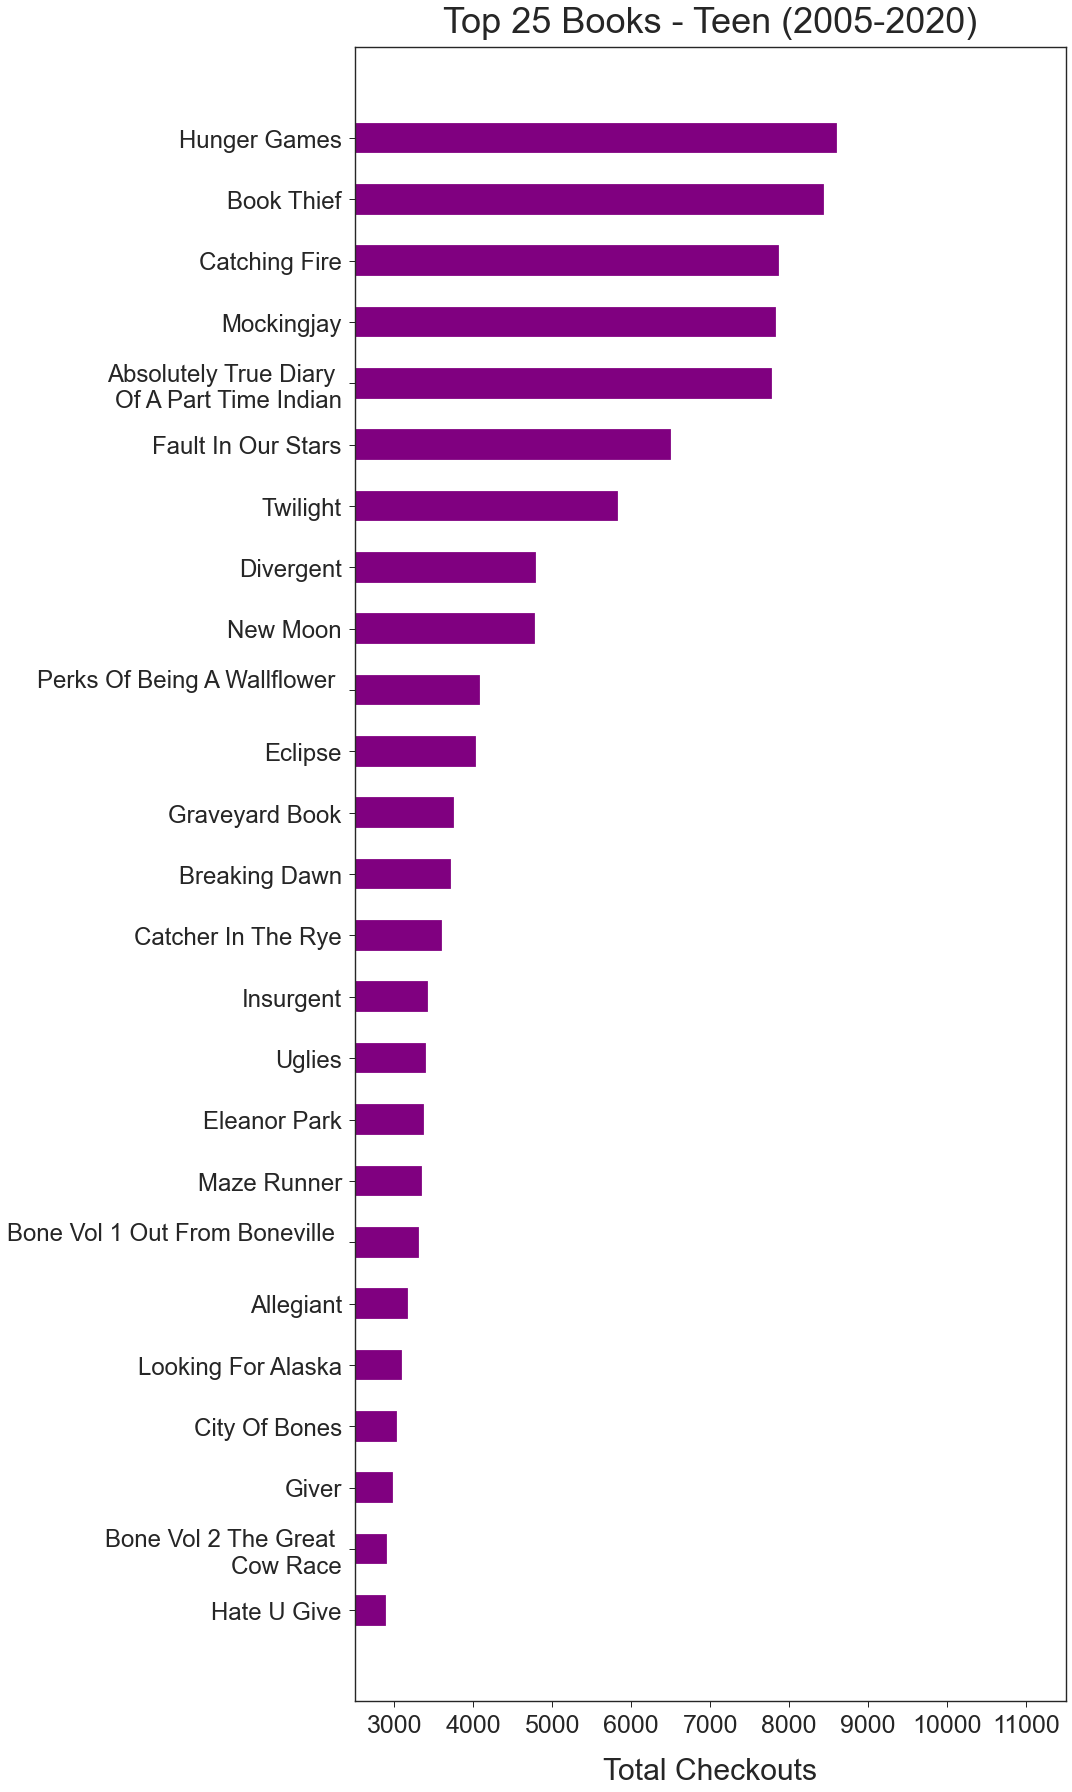

In [26]:
# create labels and prettify the plot
plt.figure(figsize=(15,25))
plt.title('Top 25 Books - Teen (2005-2020)', fontsize=36, pad=15)
plt.xlabel('Total Checkouts', fontsize=30, labelpad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=24)
plt.xlim(left=2500, right=11500)

# plot top 25 teen books
plt.barh([name_beautifier(x) for x in top25_books_teen.index][::-1],
         top25_books_teen.values[::-1], color='purple', height=0.5)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/top25_books_teen_hbar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- Not too many surprises here, with the Twilight and Hunger Games series dominating.
- A couple of John Green's books make the list (`The Fault in Our Stars` and `Looking for Alaska`).
- In my opinion, `Catcher in the Rye` is a bit of an edge case; it makes sense to me that it is classified as `Teen`, although I'm sure a fair amount of adults read it as well, although I suppose that can be said of most of these. I guess it's probably a lot of folks who forgot to read it in school and wanted to see what the hubbub was about.
- Sherman Alexie makes the list! with `The Absolutely True Diary of a Part-Time Indian`.
- I was expecting more comic books and graphic novels, but that distinction is held only by the the first two installations of the `Bone` comic books.
- Alas, no poetry.
- After the top 5, there is a notably steep decline in the popularity of the rest of the items on the list.

#### Top 25 Books - Juvenile (Children's Books)

In [27]:
%%time

# top 25 stats
top25_books_kids = df_full[(df_full.format_subgroup == 'Book') &
                           (df_full.age_group == 'Juvenile')].title.value_counts().head(25)

# take a look
top25_books_kids

CPU times: user 9.25 s, sys: 19 s, total: 28.3 s
Wall time: 40.3 s


Dinosaurs                                 11076
Where the wild things are                 10623
Green eggs and ham                         9937
very hungry caterpillar                    9926
Are you ready to play outside              9822
Chicka chicka boom boom                    9567
There is a bird on your head               9453
cat in the hat                             9246
Go dog go                                  9194
Harry Potter and the half blood prince     9172
My friend is sad                           9128
Pigs make me sneeze                        9096
Today I will fly                           8997
Goldilocks and the three bears             8918
Bob books fun                              8912
I love my new toy                          8846
Giggle giggle quack                        8804
Frog and Toad are friends                  8800
Trains                                     8784
Hop on Pop                                 8703
One fish two fish red fish blue fish    

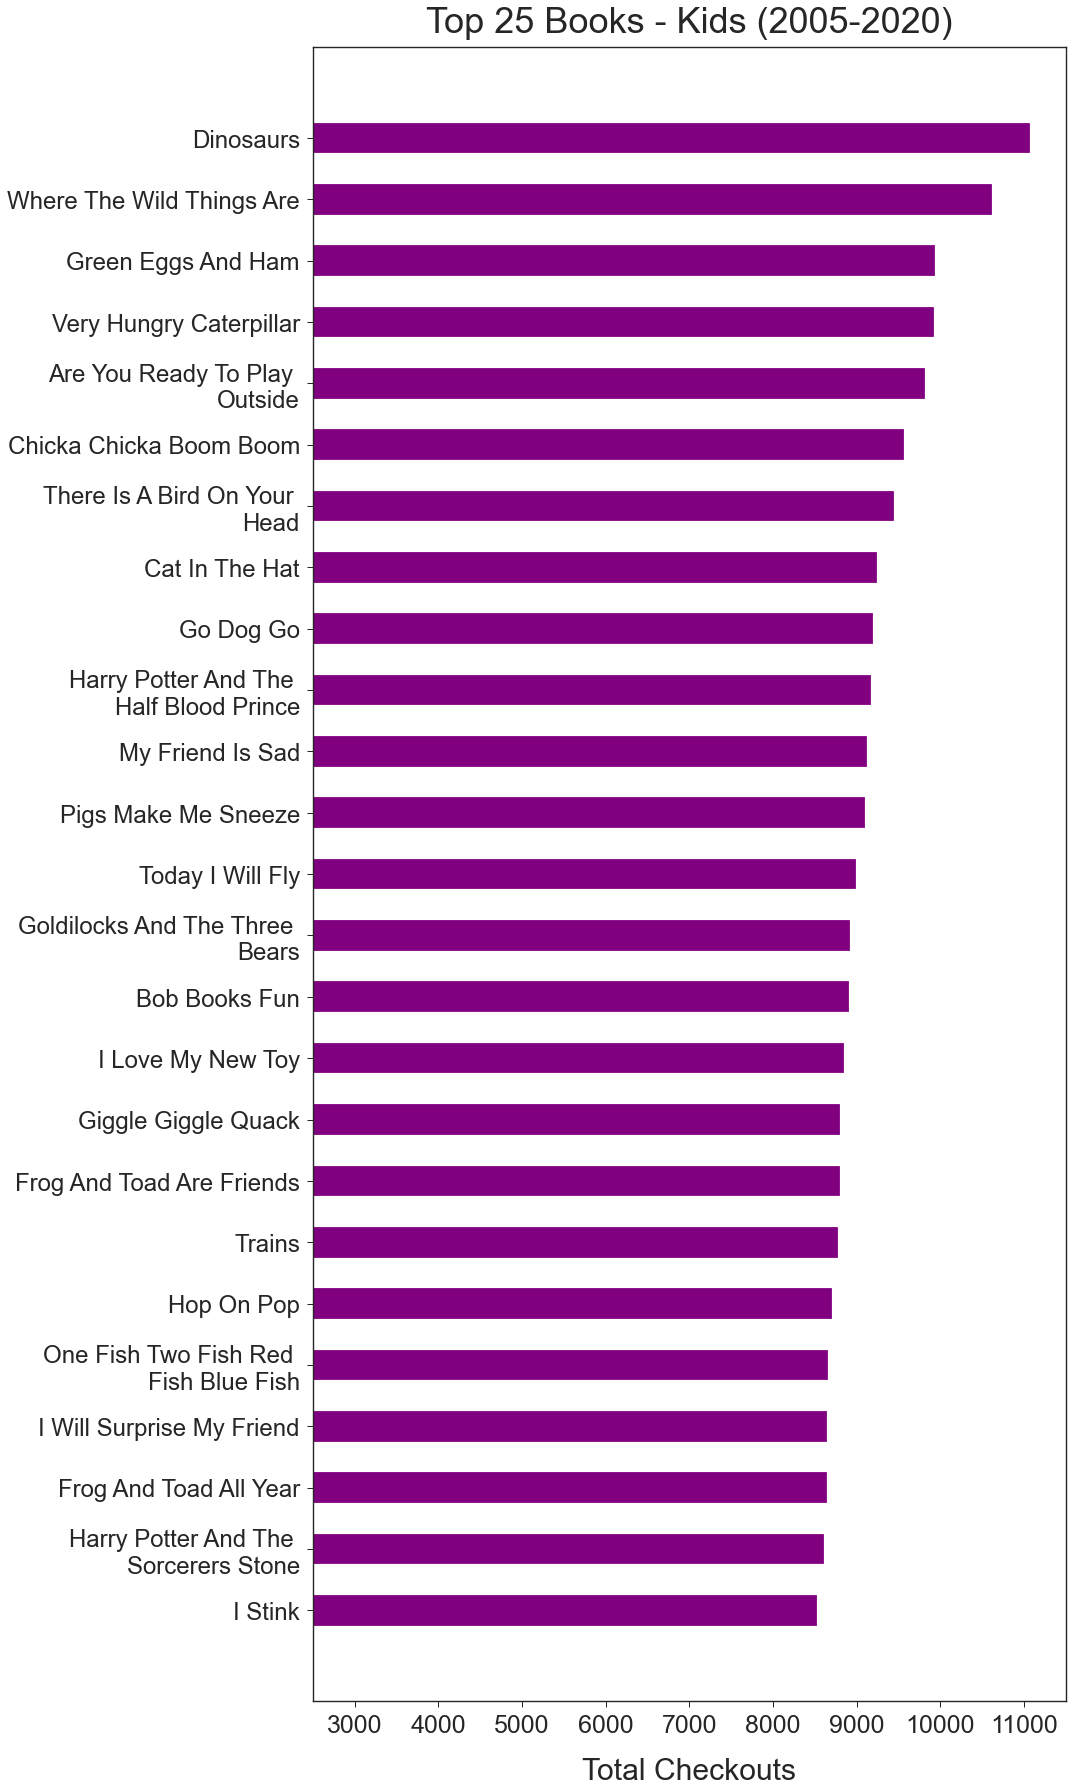

In [28]:
# create labels and prettify the plot
plt.figure(figsize=(15,25))
plt.title('Top 25 Books - Kids (2005-2020)', fontsize=36, pad=15)
plt.xlabel('Total Checkouts', fontsize=30, labelpad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=24)
plt.xlim(left=2500, right=11500)

# plot top 25 kids books
plt.barh([name_beautifier(x) for x in top25_books_kids.index][::-1],
         top25_books_kids.values[::-1], color='purple', height=0.5)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/top25_books_kids_hbar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- It's unclear to me if `Dinosaurs` refers to a single book or if it is a series that is lumped together into a single title. My guess is it one of those larger, rather thin picture books.
- Harry Potter faces some stiff competition!
    - And I'm surprised that `The Half-Blood Prince` is the most checked out book in the series.
- Unsurprisingly, Dr. Seuss is well represented.
- Compared to `Adult` and `Teen` books, children's books have a much tighter range toward that top spot.
    - A possible reason for this is that they are such quick reads that they can either be re-read (re-checked out) numerous times or read alongside numerous other books within one trip to the library.

#### Top 25 Books - Adult Fiction

In [29]:
%%time

# top 25 stats
top25_books_adult_fiction = df_full[
                                        (df_full.format_subgroup == 'Book') &
                                        (df_full.age_group == 'Adult') &
                                        (df_full.category_group == 'Fiction')
                                ].title.value_counts().head(25)

# take a look
top25_books_adult_fiction

CPU times: user 5.86 s, sys: 7.14 s, total: 13 s
Wall time: 16.6 s


Whered you go Bernadette a novel                   9600
Where the crawdads sing                            8652
help                                               7675
All the light we cannot see a novel                7561
Gone girl a novel                                  7496
girl with the dragon tattoo                        7346
Never let me go                                    7322
To kill a mockingbird                              7305
goldfinch                                          7059
There there                                        6957
girl on the train                                  6938
gentleman in Moscow                                6362
Less a novel                                       6146
Pachinko                                           6014
Hotel on the corner of bitter and sweet a novel    6003
thousand splendid suns                             5971
overstory a novel                                  5887
kite runner                                     

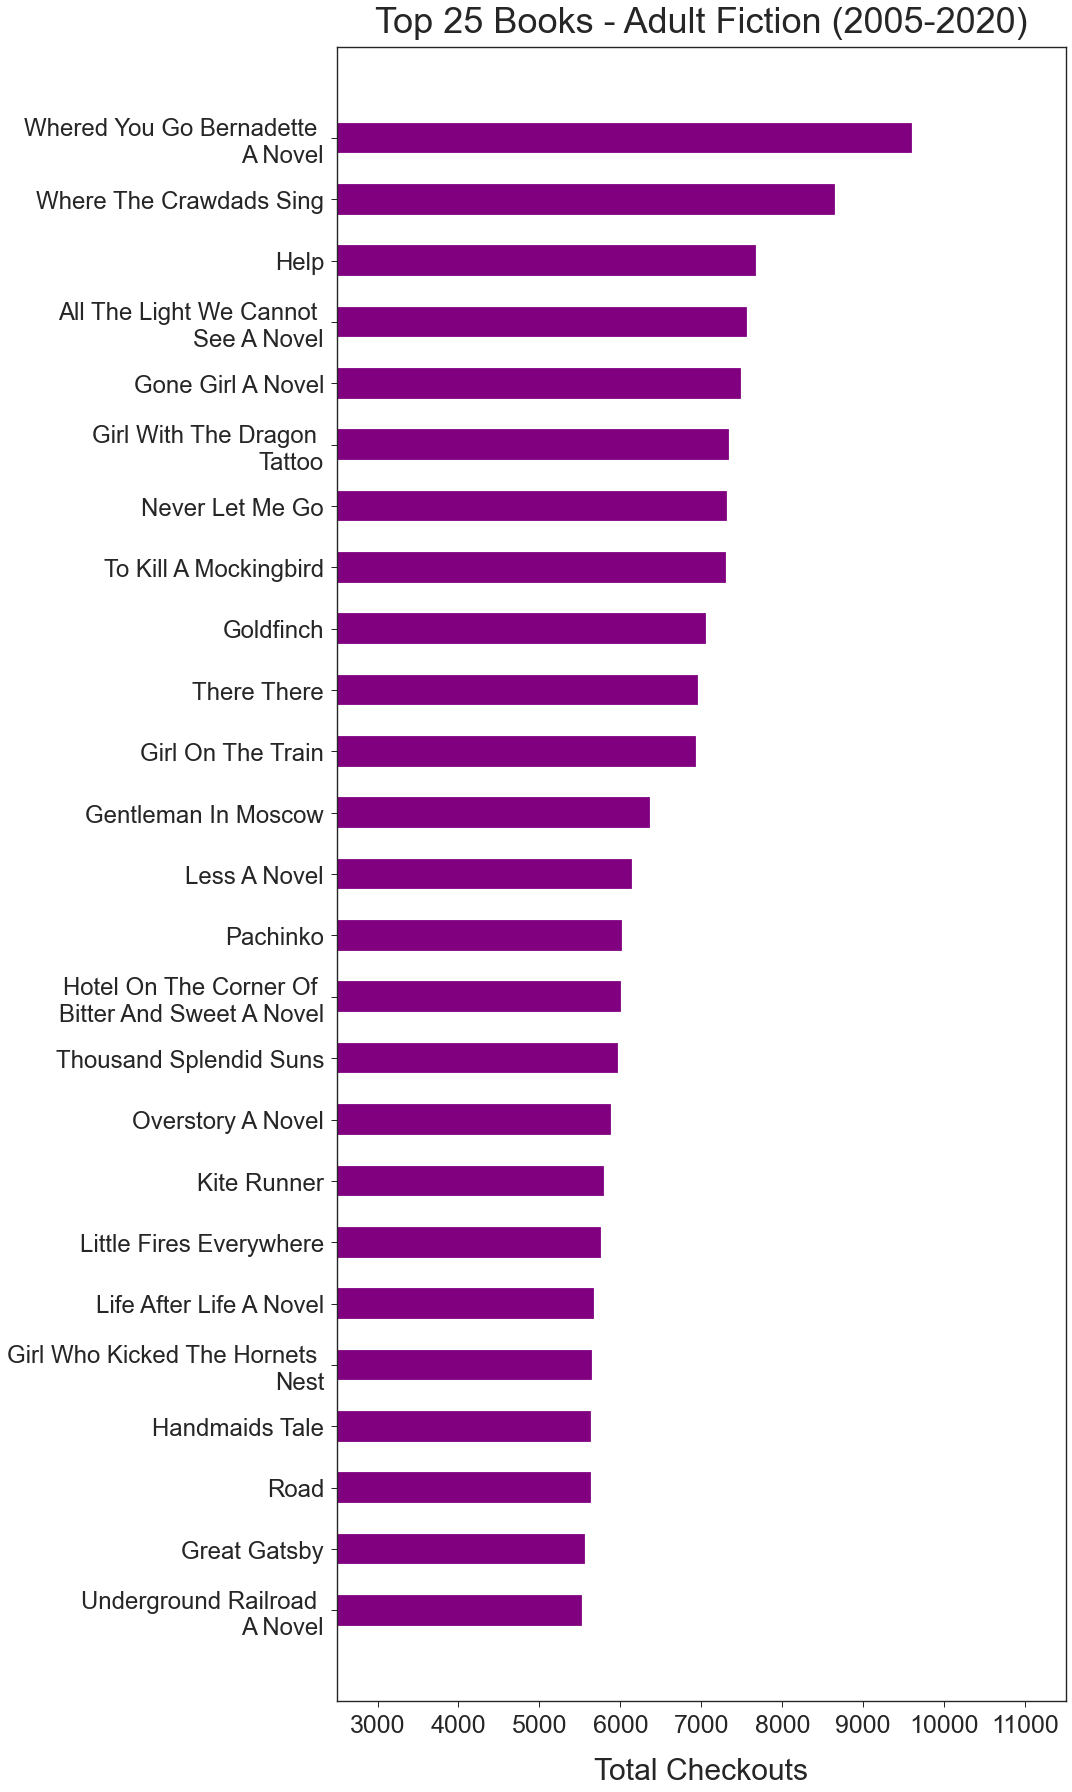

In [30]:
# create labels and prettify the plot
plt.figure(figsize=(15,25))
plt.title('Top 25 Books - Adult Fiction (2005-2020)', fontsize=36, pad=15)
plt.xlabel('Total Checkouts', fontsize=30, labelpad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=24)
plt.xlim(left=2500, right=11500)

# plot top 25 kids books
plt.barh([name_beautifier(x) for x in top25_books_adult_fiction.index][::-1],
         top25_books_adult_fiction.values[::-1], color='purple', height=0.5)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/top25_books_adult_fiction_hbar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- Lots of `Fiction` books appears to love calling attention to the fact that it is a novel.
- A fair amount of books from within series, as well as books that have either been turned into tv shows or movies.
    - Are they movies/shows because they were already popular as books? Or did movies/shows make them more popular as books? or both?
- A couple of classics, thinking specifically of `To Kill a Mockingbird` and ` The Great Gatsby`.

#### Top 25 Books - Adult Nonfiction

In [31]:
%%time

# top 25 stats
top25_books_adult_nonfiction = df_full[
                                        (df_full.format_subgroup == 'Book') &
                                        (df_full.age_group == 'Adult') &
                                        (df_full.category_group == 'Nonfiction')
                                    ].title.value_counts().head(25)

# take a look
top25_books_adult_nonfiction

CPU times: user 7.45 s, sys: 8.63 s, total: 16.1 s
Wall time: 25.9 s


Educated a memoir                                                                                                                           10735
Becoming                                                                                                                                     8355
omnivores dilemma a natural history of four meals                                                                                            7617
Quiet the power of introverts in a world that cant stop talking                                                                              7269
Outliers the story of success                                                                                                                6929
boys in the boat nine Americans and their epic quest for gold at the 1936 Berlin Olympics                                                    6755
Wild from lost to found on the Pacific Crest Trail                                                                          

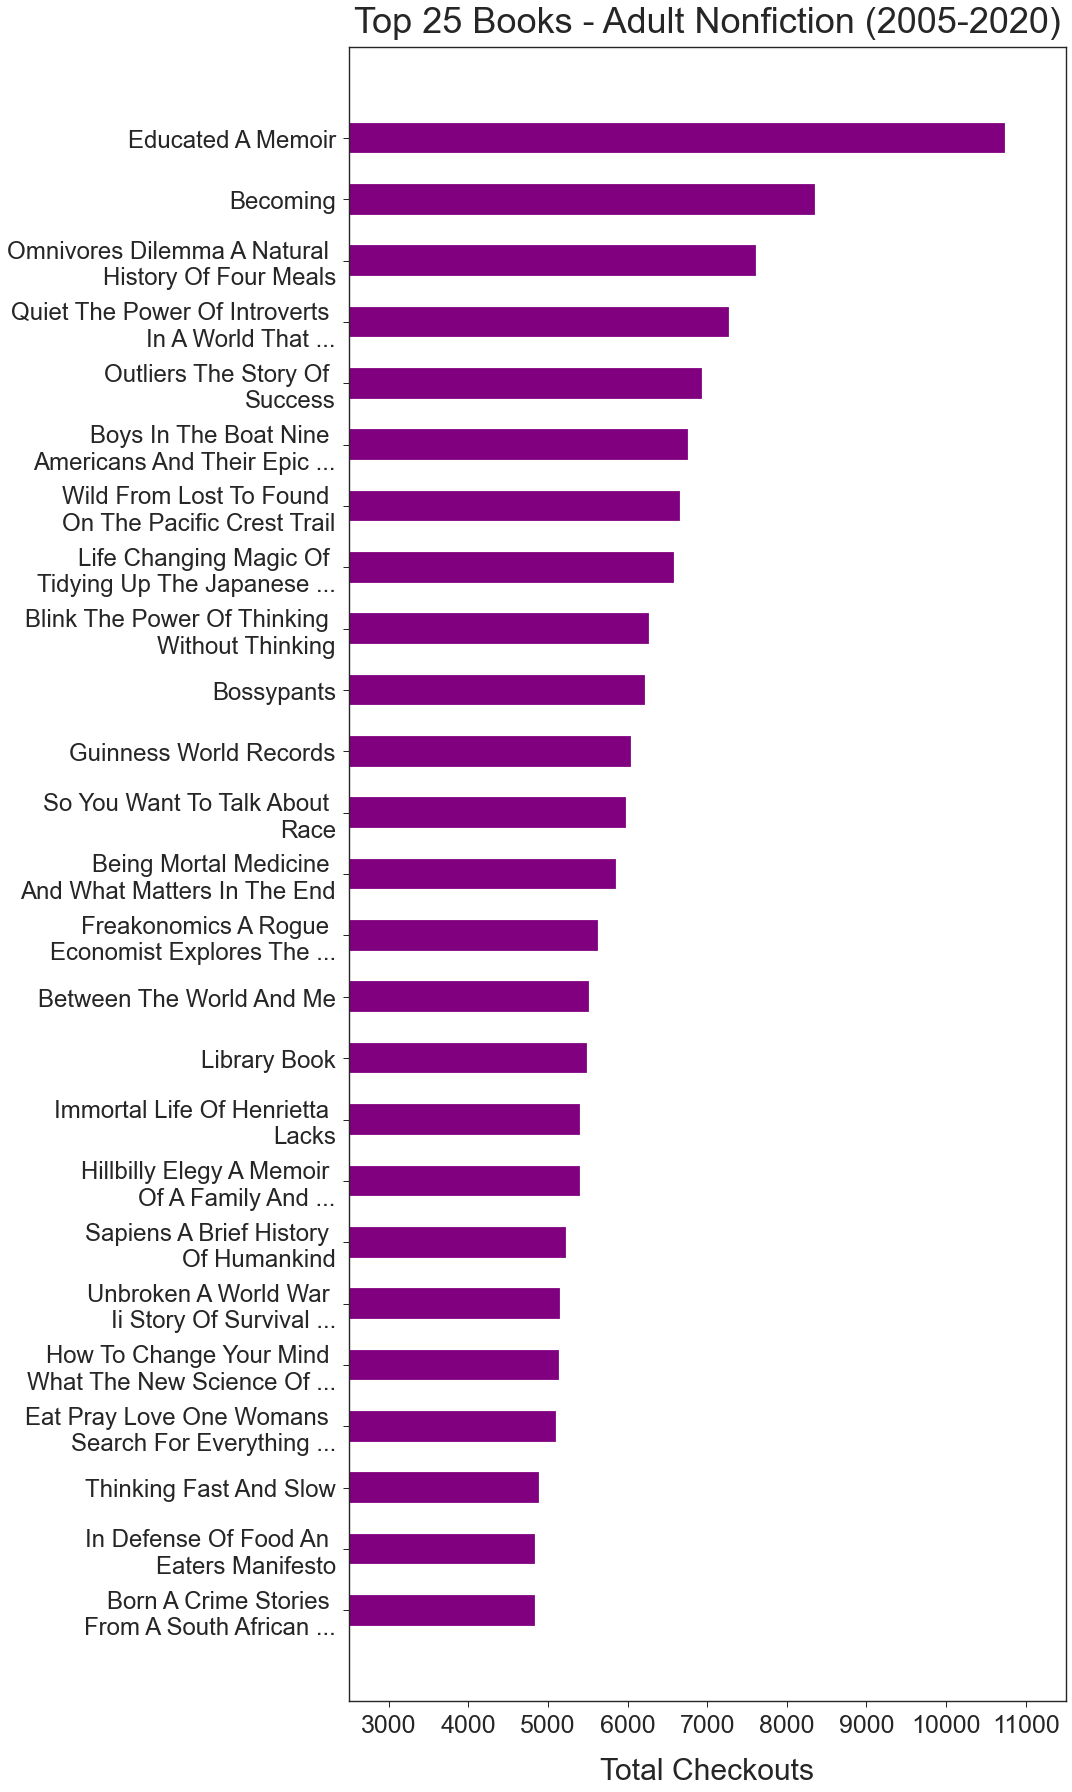

In [32]:
# create labels and prettify the plot
plt.figure(figsize=(15,25))
plt.title('Top 25 Books - Adult Nonfiction (2005-2020)', fontsize=36, pad=15)
plt.xlabel('Total Checkouts', fontsize=30, labelpad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=24)
plt.xlim(left=2500, right=11500)

# plot top 25 kids books
plt.barh([name_beautifier(x) for x in top25_books_adult_nonfiction.index][::-1],
         top25_books_adult_nonfiction.values[::-1], color='purple', height=0.5)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/top25_books_adult_nonfiction_hbar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- Lots of memoirs.
- Unsurprisingly, Marie Kondo makes the list! and Michael Pollan defeats Malcolm Gladwell by being on the list three times.
- I am intrigued by the book known as `Library Book`. It may just be a catchall title and not refer to any particular book.
- A couple of comedians (Tiny Fey and Trevor Noah) have popular nonfiction books.

#### Audiobooks

In [33]:
%%time

# top 25 stats
top25_audiobooks = df_full[(df_full.format_subgroup == 'Audiobook Disc') |
                           (df_full.format_subgroup == 'Audiobook Tape')].title.value_counts().head(25)

# take a look
top25_audiobooks

CPU times: user 1.23 s, sys: 3.02 s, total: 4.25 s
Wall time: 6.81 s


Pimsleur language programs Spanish 1 A the complete course                     6133
Harry Potter and the half blood prince                                         4394
Pimsleur language programs Spanish 1 B the complete course                     4230
Harry Potter and the sorcerers stone                                           3957
Harry Potter and the deathly hallows                                           3671
Spanish Latin American the short course                                        3594
Harry Potter and the chamber of secrets                                        3355
Pimsleur language programs French I A the complete course                      3227
Harry Potter and the Order of the Phoenix                                      3005
Pimsleur language programs Spanish II A the complete course                    2941
Harry Potter and the goblet of fire                                            2899
When you are engulfed in flames                                             

- Lots of language tapes.
- As I suspected, Harry Potter is a huge presence here.
- Shout out to David Sedaris, although I'm surprised that that is the particular audiobook that made the list.

### Movies

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

#### Top 25 movies overall

#### ⏰ Cell below takes ~1 minute to run. ⏰

In [34]:
%%time

# top 25 stats
top25_movies = df_full[df_full.format_subgroup == 'Video Disc'].title.value_counts().head(25)

# take a look
top25_movies

CPU times: user 11 s, sys: 25.2 s, total: 36.2 s
Wall time: 56.5 s


Into the wild                      19011
Michael Clayton                    17334
Burn after reading                 17049
Darjeeling Limited                 16481
Atonement                          16363
No country for old men             16285
reader                             16151
Doubt                              16133
Vicky Cristina Barcelona           15818
other Boleyn girl                  15664
Juno                               15571
curious case of Benjamin Button    15287
Slumdog millionaire                15253
WALL E                             14991
Gone baby gone                     14662
Milk                               14424
Savages                            14175
Once                               14128
Charlie Wilsons war                13862
Rachel getting married             13799
Becoming Jane                      13729
Mamma mia                          13710
golden compass                     13662
kite runner                        13541
Quantum of solac

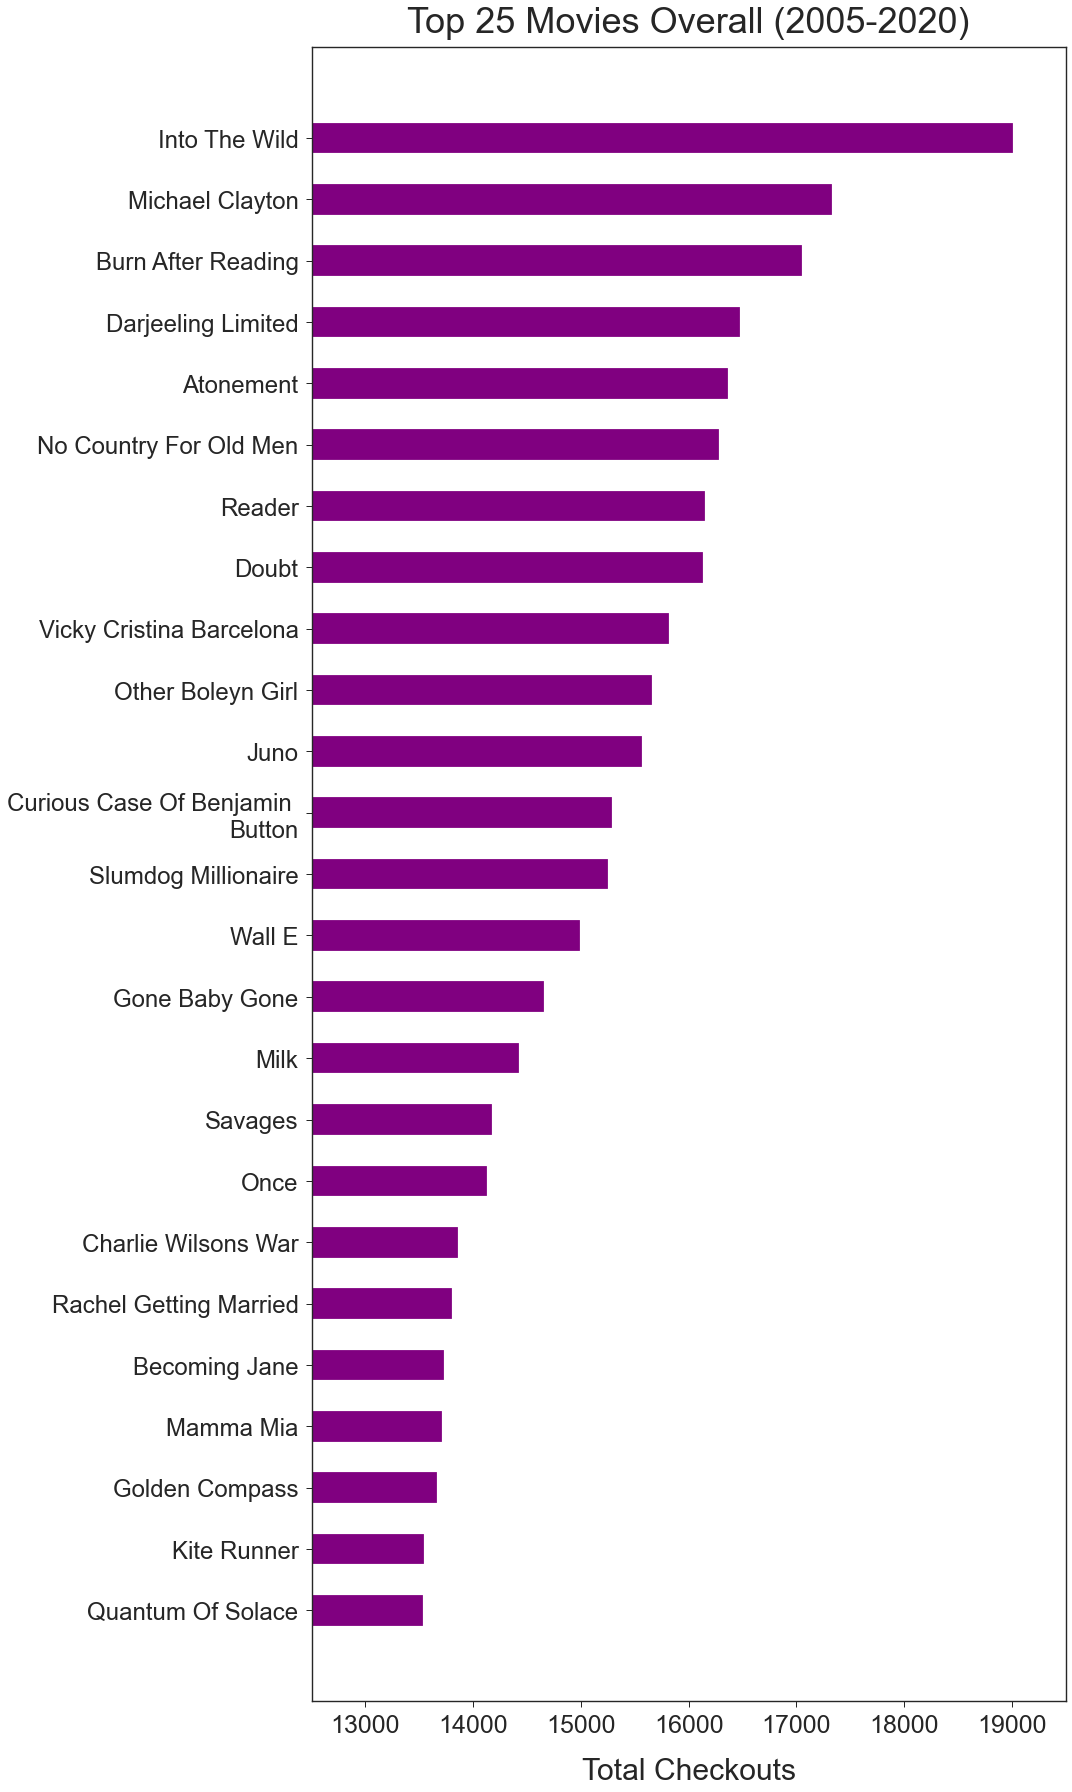

In [35]:
# create labels and prettify the plot
plt.figure(figsize=(15,25))
plt.title('Top 25 Movies Overall (2005-2020)', fontsize=36, pad=15)
plt.xlabel('Total Checkouts', fontsize=30, labelpad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=24)
plt.xlim(left=12500, right=19500)

# plot top 25 books
plt.barh([name_beautifier(x) for x in top25_movies.index][::-1], top25_movies.values[::-1], color='purple', height=0.5)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/top25_movies_hbar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

#### Top 10 kid's movies

In [36]:
%%time

# top 10 stats
top10_kids_movies = df_full[(df_full.format_subgroup == 'Video Disc') &
                            (df_full.age_group == 'Juvenile')].title.value_counts().head(10)

# take a look
top10_kids_movies

CPU times: user 1.21 s, sys: 434 ms, total: 1.65 s
Wall time: 1.8 s


WALL E                                 14991
Up                                     12277
Enchanted                              12026
Ratatouille                            11540
Kung fu panda                          11225
Bolt                                    9866
Cinderella                              9807
Charlottes web                          9265
chronicles of Narnia Prince Caspian     9021
Frozen                                  8976
Name: title, dtype: int64

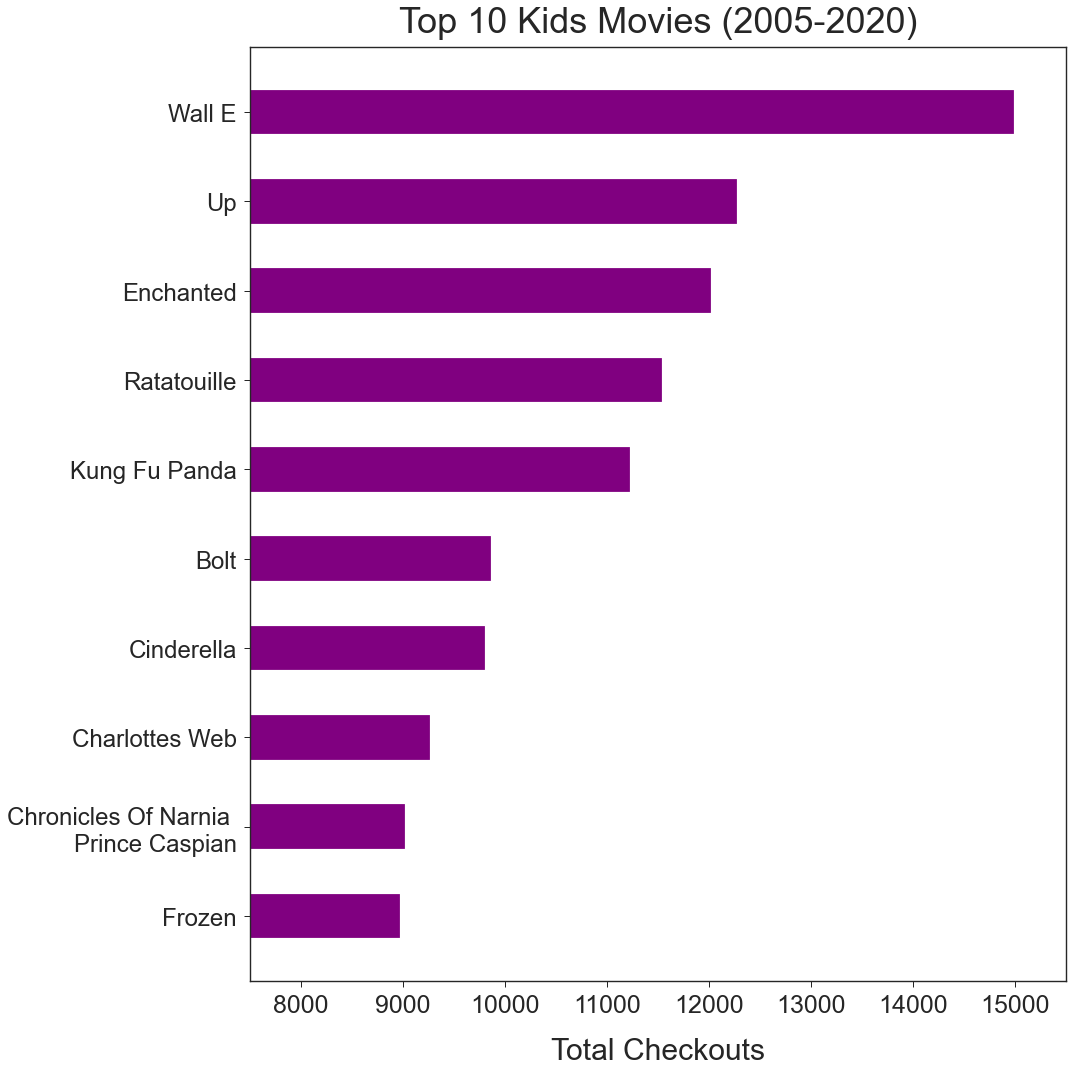

In [37]:
# create labels and prettify the plot
plt.figure(figsize=(15,15))
plt.title('Top 10 Kids Movies (2005-2020)', fontsize=36, pad=15)
plt.xlabel('Total Checkouts', fontsize=30, labelpad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=24)
plt.xlim(left=7500, right=15500)

# plot top 25 books
plt.barh([name_beautifier(x) for x in top10_kids_movies.index][::-1],
         top10_kids_movies.values[::-1], color='purple', height=0.5)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/top10_kids_movies_hbar.png', 
            bbox_inches='tight', transparent=True)
plt.show()

#### Top 10 movies - Nonfiction

In [38]:
%%time

# top 10 stats
top10_documentaries = df_full[
                                        (df_full.format_subgroup == 'Video Disc') &
                                        (df_full.category_group == 'Nonfiction')
                                    ].title.value_counts().head(10)

# take a look
top10_documentaries

CPU times: user 1.15 s, sys: 405 ms, total: 1.56 s
Wall time: 1.63 s


Sicko                                  10764
March of the penguins                   8255
Religulous                              7982
Man on wire                             7722
Food Inc                                6736
inconvenient truth a global warning     6428
Grizzly man                             5467
Inside job                              5028
Jesus camp                              4800
Fahrenheit 9 11                         4421
Name: title, dtype: int64

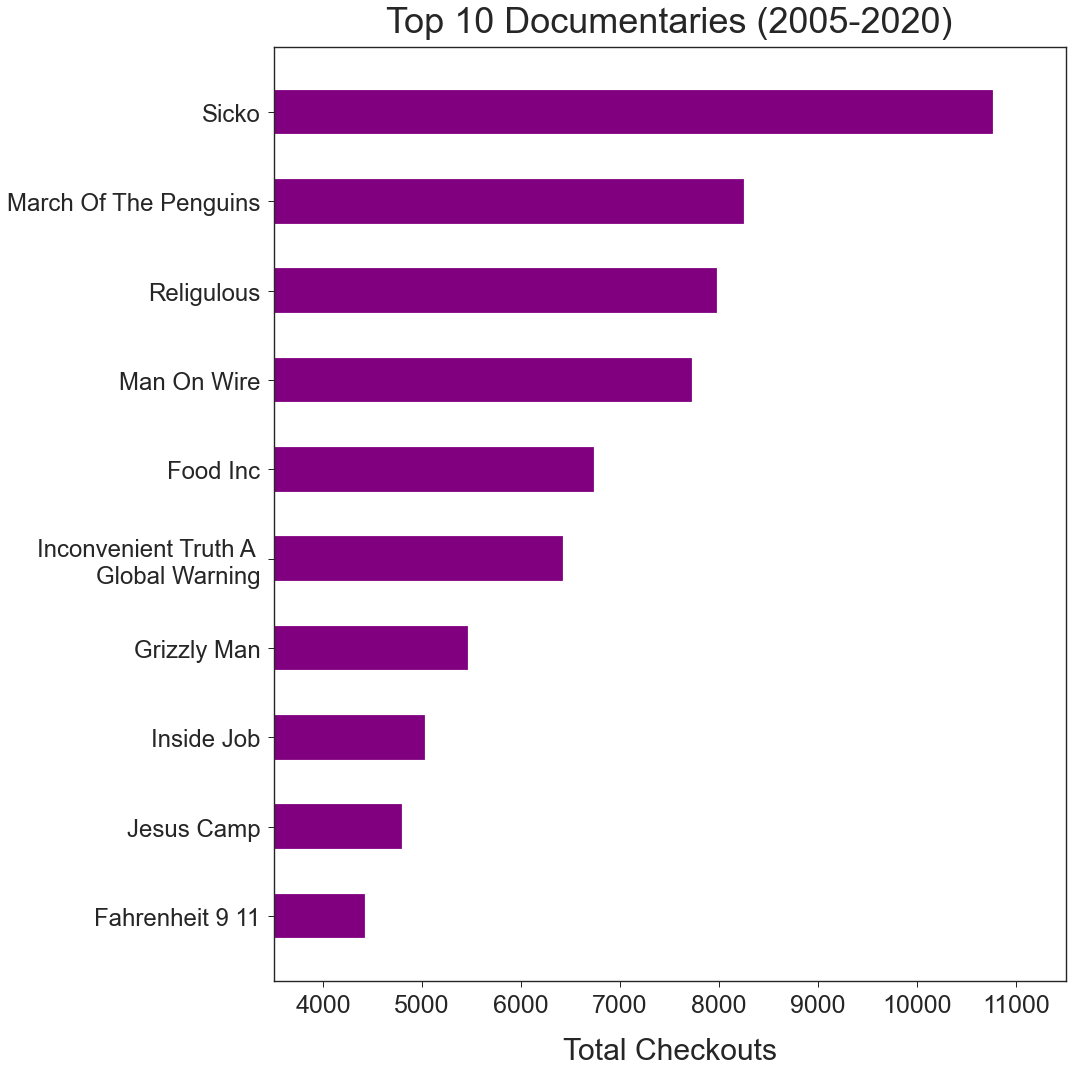

In [39]:
# create labels and prettify the plot
plt.figure(figsize=(15,15))
plt.title('Top 10 Documentaries (2005-2020)', fontsize=36, pad=15)
plt.xlabel('Total Checkouts', fontsize=30, labelpad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=24)
plt.xlim(left=3500, right=11500)

# plot top 25 books
plt.barh([name_beautifier(x) for x in top10_documentaries.index][::-1],
         top10_documentaries.values[::-1], color='purple', height=0.5)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/top10_documentaries_hbar.png', 
            bbox_inches='tight', transparent=True)
plt.show()

- Michael Moore makes the Top 10 twice, in the #1 and #10 spot.

#### Top 10 VHS tapes

In [40]:
%%time

# top 10 stats
top10_tapes = df_full[(df_full.format_subgroup == 'Video Tape')].title.value_counts().head(10)

# take a look
top10_tapes

CPU times: user 464 ms, sys: 1.34 s, total: 1.8 s
Wall time: 3.2 s


pianist                  1784
Adaptation               1746
Oceans 11                1696
Moulin Rouge             1679
Chocolat                 1582
Catch me if you can      1576
Bend it like Beckham     1562
beautiful mind           1557
Bowling for Columbine    1511
Hours                    1510
Name: title, dtype: int64

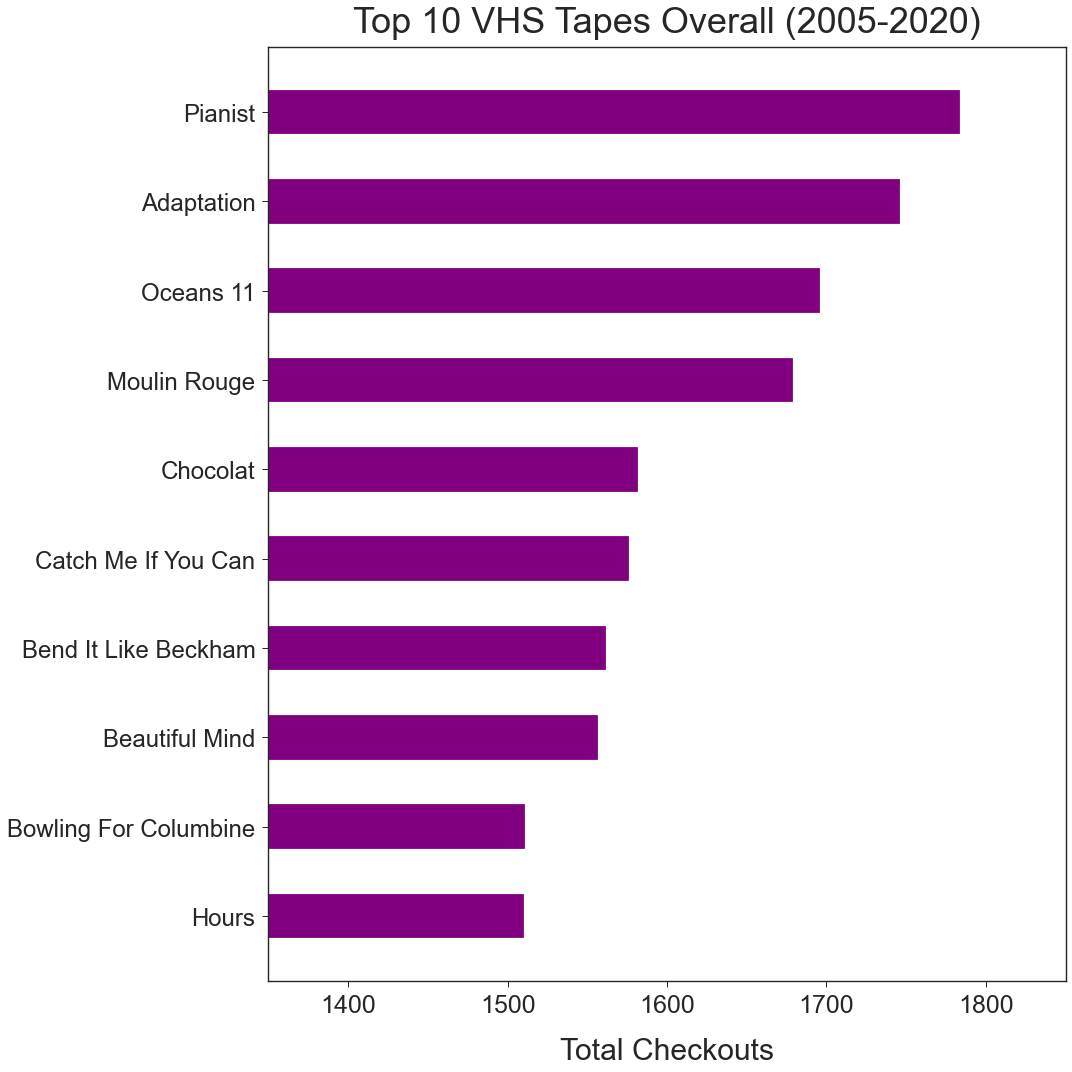

In [41]:
# create labels and prettify the plot
plt.figure(figsize=(15,15))
plt.title('Top 10 VHS Tapes Overall (2005-2020)', fontsize=36, pad=15)
plt.xlabel('Total Checkouts', fontsize=30, labelpad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=24)
plt.xlim(left=1350, right=1850)

# plot top 10 books
plt.barh([name_beautifier(x) for x in top10_tapes.index][::-1],
         top10_tapes.values[::-1], color='purple', height=0.5)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/top10_tapes_hbar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

I really like this as a snapshot of what folks were watching as DVD and eventually Blu Ray was taking over.

- These are all movies released between 2000 and 2002, including several Best Picture nominees (`Chocolat`, `Moulin Rouge!`, `The Hours`, `The Pianist`) and one winner (`Beautiful Mind`).
    - `Adaptation` received a nomination for Best Original Screenplay (and happens to be one of my favorite movies!)
- Again, Michael Moore makes the list! the only documentary to do so.
- Special shoutout to `Bend It Like Beckham`, which certainly holds a special (albeit polarizing) place in the teen movie zeitgeist.

### Music

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

#### Greatest hits

I noticed that there is a catchall title of `Greatest hits` that refers to CDs across multiple genres, as seen in the snippet below. I'm now curious as to which types of "greatest hits" are most popular in the Seattle Library system.

In [42]:
%%time

# had to sort by date or else it is sorted by format_group and only shows "Print" in the `.head()` view
df_full[df_full.title == 'Greatest hits'].sort_values('date').head(20)

CPU times: user 8.15 s, sys: 18.3 s, total: 26.4 s
Wall time: 41.2 s


title                                           subjects  \
36950360  Greatest hits  Rock music 1971 1980, Rock music 1981 1990, Ro...   
36841964  Greatest hits         Rock music 1971 1980, Rock music 1961 1970   
36861318  Greatest hits  Popular music 1951 1960, Popular music 1961 19...   
36931813  Greatest hits                               Rock music 1961 1970   
37002937  Greatest hits         Rock music 1971 1980, Rock music 1981 1990   
36938769  Greatest hits  Folk music United States, Folk songs English U...   
36793193  Greatest hits         Contemporary Christian music, Gospel music   
36963817  Greatest hits                   Piano music Jazz, Jazz 1921 1930   
70456703  Greatest hits  Popular music Ireland 1991 2000, Popular music...   
36956800  Greatest hits         Rock music 1981 1990, Rock music 1961 1970   
36789372  Greatest hits    Soul music, Funk Music, Popular music 1971 1980   
70426267  Greatest hits                                         Rock music   
36841944  Greatest hits                            Country music 1981 1990   
36969384  Greatest hits  Folk music United States, Folk songs English U...   
36915840  Greatest hits                                      Popular music   
70420006  Greatest hits                            Country music 1981 1990   
36875869  Greatest hits                            Country music 1981 1990   
36977309  Greatest hits         Rock music 1971 1980, Rock music 1981 1990   
36827768  Greatest hits                                          Rap Music   
37039309  Greatest hits                               Rock music 1971 1980   

                date format_group format_subgroup category_group age_group  
36950360  2005-04-13        Media      Audio Disc     Nonfiction     Adult  
36841964  2005-04-13        Media      Audio Disc     Nonfiction     Adult  
36861318  2005-04-13        Media      Audio Disc     Nonfiction     Adult  
36931813  2005-04-13        Media      Audio Disc     Nonfiction     Adult  
37002937  2005-04-13        Media      Audio Disc     Nonfiction     Adult  
36938769  2005-04-13        Media      Audio Disc     Nonfiction     Adult  
36793193  2005-04-13        Media      Audio Disc     Nonfiction     Adult  
36963817  2005-04-13        Media      Audio Disc     Nonfiction     Adult  
70456703  2005-04-13        Media      Audio Disc     Nonfiction     Adult  
36956800  2005-04-14        Media      Audio Disc     Nonfiction     Adult  
36789372  2005-04-14        Media      Audio Disc     Nonfiction     Adult  
70426267  2005-04-14        Media      Audio Disc     Nonfiction     Adult  
36841944  2005-04-14        Media      Audio Disc     Nonfiction     Adult  
36969384  2005-04-14        Media      Audio Disc     Nonfiction     Adult  
36915840  2005-04-14        Media      Audio Disc     Nonfiction     Adult  
70420006  2005-04-14        Media      Audio Disc     Nonfiction     Adult  
36875869  2005-04-14        Media      Audio Disc     Nonfiction     Adult  
36977309  2005-04-15        Media      Audio Disc     Nonfiction     Adult  
36827768  2005-04-15        Media      Audio Disc     Nonfiction     Adult  
37039309  2005-04-15        Media      Audio Disc     Nonfiction     Adult

I'll subset out entries with this title and clean/combine entries into their applicable genres.

In [43]:
# subset
greatest_hits = df_full[df_full.title == 'Greatest hits']

In [44]:
# list of genres
## NOTE: order is important here
##       "popular" is last so that if any other genre is used, the latter genre will take priority
music_genres = ['gospel', 'soul', 'operas', 'christian', 'reggae', 'humorous', 'orchestral', 
                'childrens', 'jazz', 'folk', 'piano', 'blues', 'country', 'rap', 'rock', 'popular']

In [45]:
# use first word to determine category
conditions_1 = [
    greatest_hits.subjects.str.lower().str.startswith(genre) for genre in music_genres  
]

# use first applicable genre that is found in the string to determine category
conditions_2 = [
    greatest_hits.subjects.str.lower().str.contains(genre) for genre in music_genres 
]

# combine conditions
conditions = conditions_1 + conditions_2

# create labels (x2 to match shape of conditions)
choices = [genre for genre in music_genres] * 2

In [46]:
# transform
greatest_hits['subjects'] = np.select(conditions, choices, 'other')

In [47]:
# obtain counts for each genre
greatest_hits.subjects.value_counts()

rock          41925
popular       14205
rap            5070
country        4603
folk           2431
jazz           2197
soul           1706
piano           770
blues           483
gospel          142
christian       112
operas           87
orchestral       86
humorous         33
childrens        33
reggae           24
Name: subjects, dtype: int64

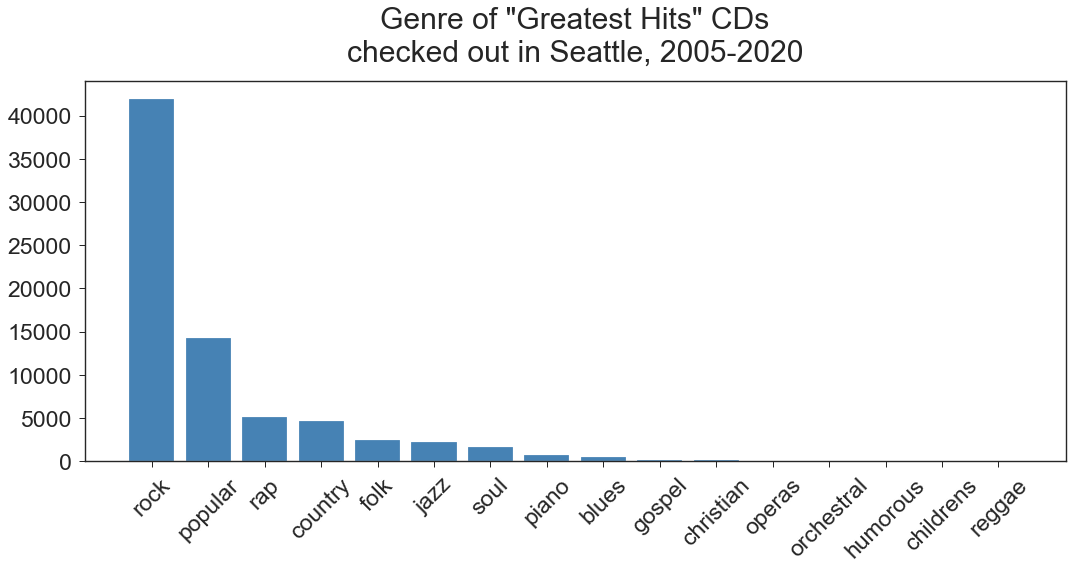

In [48]:
# obtain counts for each genre
col_counts = greatest_hits.subjects.value_counts()

# prettify the plot
plt.figure(figsize=(15,8))
plt.title('Genre of "Greatest Hits" CDs\nchecked out in Seattle, 2005-2020', 
          fontsize=30, pad=20)
plt.ylabel('', fontsize=28, labelpad=15)
plt.xticks(fontsize=23, rotation=45)
plt.yticks(fontsize=23)

# plot counts
plt.bar(col_counts.index, col_counts.values, color='steelblue')

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/greatest_hits_genre_counts.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- Perhaps unsurprisingly, rock music has a commanding lead, followed by pop music.
- Rap narrowly edges out country music.
- The bottom five all had fewer than 100 checkouts.

### Equipment

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

The group `Equipment` only accounts for about 0.065% of the data, but I'm still interested in what sorts of items it is comprised of.

In [49]:
# equipment counts
top_equipment = df_full[df_full.format_group == 'Equipment'].title.value_counts()

# take a look
top_equipment

SPL HotSpot connecting Seattle    34217
FlexTech Laptops                  19577
In Building Device Checkout       15399
Uncataloged USB floppy drives        18
Name: title, dtype: int64

- For the purposes of the below graph, I won't include `Uncataloged USB floppy drives` as there are so few checkouts, but I did want to give a quick shout out to one of the most beloved memory storage systems. Go floppy!

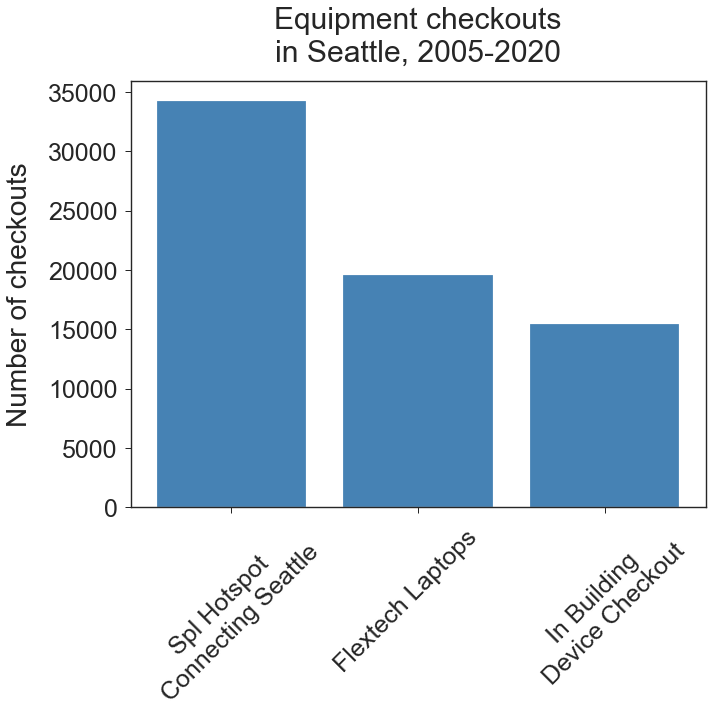

In [50]:
col_counts = df_full[df_full.format_group == 'Equipment'].title.value_counts().head(3)

# create labels and prettify the plot
plt.figure(figsize=(10,10))
plt.title('Equipment checkouts\nin Seattle, 2005-2020', 
          fontsize=30, pad=20)
plt.suptitle('')
# plt.xlabel('Format', fontsize=28, labelpad=15)
plt.ylabel('Number of checkouts', fontsize=28, labelpad=15)
plt.xticks(fontsize=25, rotation=45)
plt.yticks(fontsize=25)

# plot counts
plt.bar([name_beautifier(x, 15) for x in col_counts.index], col_counts.values, color='steelblue')

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/equipment_counts.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- Most of the equipment appears to be bringing computers and the internet to Seattle residents. If I had to guess, I would say that this also applies to the more general `In Building Device Checkout`.

Now I'll take a look at what is going on in the `Other` format group.

### Other

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

Overall, the group `Other` only accounts for about 0.2% of the data. Still, it is worth exploring what is within the group.

In [51]:
# other counts
top_other = df_full[df_full.format_group == 'Other'].title.value_counts().head(25)

# take a look
top_other

Man of steel                                         724
Girls The complete first season                      390
Vikings The complete first season                    194
Sisterland a novel                                   194
10 things I hate about you                           189
Duck Dodgers Deep space duck                         174
What money cant buy the moral limits of markets      150
Enough said                                          141
good lord bird                                       135
Insidious Chapter 2                                  135
Florida                                              128
Looper                                               110
Django unchained                                      84
Away in a star sled                                   83
Big Sur                                               80
red tent                                              74
third coast when Chicago built the American dream     71
mark of Athena                 

In [52]:
# total number of items with the format group "Unique"
len(df_full[df_full.format_group == 'Other'].title.unique())

94078

- Granted the above is a small snapshot of the entire picture, but it's a bit mysterious as to why these items are marked as `Other`, other than simple clerical errors.
    - I'm seeing mostly movies and tv shows, maybe a book or two (*Sisterland*, and perhaps *Big Sur* by Jack Kerouac perhaps?), as well as a CD (is *Hard Day's Night* the movie or the album?).
- Since there are over 94,000 unique titles *and* the checkout counts are presumably so low for the great majority of them, it's not really worth trying to impute the correct values.

## Checkouts over time

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

- First, I'll take a look at the data.

In [203]:
df_counts.head()

total_checkouts  missing_title  missing_subjects  \
2005-04-13          16471.0          212.0             664.0   
2005-04-14          10358.0          123.0             541.0   
2005-04-15          12896.0          179.0             508.0   
2005-04-16           1358.0            7.0              56.0   
2005-04-17           4555.0           80.0             232.0   

            format_group_Equipment  format_group_Media  format_group_Other  \
2005-04-13                     1.0              6397.0                32.0   
2005-04-14                     1.0              4015.0                75.0   
2005-04-15                     0.0              5351.0                51.0   
2005-04-16                     0.0               552.0                 0.0   
2005-04-17                     0.0              1555.0                 8.0   

            format_group_Print  format_subgroup_Art  \
2005-04-13             10041.0                  0.0   
2005-04-14              6267.0                  0.0   
2005-04-15              7494.0                  0.0   
2005-04-16               806.0                  0.0   
2005-04-17              2992.0                  0.0   

            format_subgroup_Audio Disc  format_subgroup_Audio Tape  \
2005-04-13                      1874.0                        63.0   
2005-04-14                      1245.0                        31.0   
2005-04-15                      1462.0                        54.0   
2005-04-16                       175.0                         8.0   
2005-04-17                       499.0                        10.0   

            format_subgroup_Audiobook Disc  format_subgroup_Audiobook Tape  \
2005-04-13                           217.0                           308.0   
2005-04-14                           164.0                           156.0   
2005-04-15                           187.0                           239.0   
2005-04-16                            31.0                            23.0   
2005-04-17                            47.0                            96.0   

            format_subgroup_Book  format_subgroup_Data Disc  \
2005-04-13                9970.0                       10.0   
2005-04-14                6225.0                        7.0   
2005-04-15                7452.0                       12.0   
2005-04-16                 802.0                        1.0   
2005-04-17                2946.0                        9.0   

            format_subgroup_Document  format_subgroup_Film  \
2005-04-13                       0.0                   0.0   
2005-04-14                       0.0                   0.0   
2005-04-15                       0.0                   0.0   
2005-04-16                       0.0                   0.0   
2005-04-17                       0.0                   0.0   

            format_subgroup_Folder  format_subgroup_Kit  \
2005-04-13                     8.0                 97.0   
2005-04-14                     8.0                 85.0   
2005-04-15                     4.0                 80.0   
2005-04-16                     2.0                  9.0   
2005-04-17                     7.0                 19.0   

            format_subgroup_Music Score  format_subgroup_Periodical  \
2005-04-13                         40.0                         0.0   
2005-04-14                         28.0                         0.0   
2005-04-15                         35.0                         0.0   
2005-04-16                          1.0                         0.0   
2005-04-17                         27.0                         0.0   

            format_subgroup_Video Disc  format_subgroup_Video Tape  \
2005-04-13                      1950.0                      1878.0   
2005-04-14                      1212.0                      1115.0   
2005-04-15                      1596.0                      1721.0   
2005-04-16                       142.0                       163.0   
2005-04-17                       395.0               

In [200]:
# check shape
df_counts.shape

(5470, 31)

In [54]:
# descriptive statistics
df_counts.describe()

total_checkouts  missing_title  missing_subjects  \
count      5470.000000    5470.000000       5470.000000   
mean      19470.538026     164.477331        301.539671   
std        6853.252363     108.737499        208.403675   
min           1.000000       0.000000          0.000000   
25%       15632.250000      93.000000        139.000000   
50%       19850.500000     181.000000        232.000000   
75%       23927.250000     248.000000        450.000000   
max      103560.000000     475.000000       1080.000000   

       format_group_Equipment  format_group_Media  format_group_Other  \
count             5470.000000         5470.000000         5470.000000   
mean                12.652834         8522.524497           36.645887   
std                 22.960402         3647.667482           50.480364   
min                  0.000000            0.000000            0.000000   
25%                  0.000000         5918.750000            7.000000   
50%                  0.000000         8365.500000           15.000000   
75%                 20.000000        11011.000000           36.000000   
max                125.000000        21234.000000          351.000000   

       format_group_Print  format_subgroup_Art  format_subgroup_Audio Disc  \
count         5470.000000          5470.000000                 5470.000000   
mean         10898.714808             0.023583                 2054.627605   
std           3604.646478             0.221350                 1098.852407   
min              0.000000             0.000000                    0.000000   
25%           8970.750000             0.000000                 1175.000000   
50%          11494.500000             0.000000                 1933.500000   
75%          13103.500000             0.000000                 2862.750000   
max          82250.000000             8.000000                 5530.000000   

       format_subgroup_Audio Tape  format_subgroup_Audiobook Disc  \
count                 5470.000000                     5470.000000   
mean                     8.399634                      492.701645   
std                     15.627219                      217.748647   
min                      0.000000                        0.000000   
25%                      0.000000                      336.000000   
50%                      0.000000                      484.000000   
75%                     10.000000                      652.000000   
max                    100.000000                     1709.000000   

       format_subgroup_Audiobook Tape  format_subgroup_Book  \
count                     5470.000000           5470.000000   
mean                        43.935649          10862.427971   
std                         82.104667           3595.939352   
min                          0.000000              0.000000   
25%                          0.000000           8936.000000   
50%                          0.000000          11459.000000   
75%                         55.000000          13067.250000   
max                        488.000000          82170.000000   

       format_subgroup_Data Disc  format_subgroup_Document  \
count                5470.000000               5470.000000   
mean                    1.807313                  0.086106   
std                     3.984402                  0.492111   
min                     0.000000                  0.000000   
25%                     0.000000                  0.000000   
50%                     0.000000                  0.000000   
75%                     2.000000                  0.000000   
max                   107.000000                 15.000000   

       format_subgroup_Film  format_subgroup_Folder  format_subgroup_Kit  \
count           5470.000000             5470.000000          5470.000000   
mean               0.014808                4.369287           127.093419   
std                0.165502                2.942990            49.636428   
min                0.000000                0.000000          

In [55]:
# look at instance of max checkouts
df_counts[df_counts.total_checkouts > 40000]

total_checkouts  missing_title  missing_subjects  \
date                                                           
2020-03-13           103560              2               534   

            format_group_Equipment  format_group_Media  format_group_Other  \
date                                                                         
2020-03-13                    53.0             21234.0                23.0   

            format_group_Print  format_subgroup_Art  \
date                                                  
2020-03-13             82250.0                  0.0   

            format_subgroup_Audio Disc  format_subgroup_Audio Tape  \
date                                                                 
2020-03-13                      1831.0                         0.0   

            format_subgroup_Audiobook Disc  format_subgroup_Audiobook Tape  \
date                                                                         
2020-03-13                          1709.0                             0.0   

            format_subgroup_Book  format_subgroup_Data Disc  \
date                                                          
2020-03-13               82170.0                        0.0   

            format_subgroup_Document  format_subgroup_Film  \
date                                                         
2020-03-13                       0.0                   0.0   

            format_subgroup_Folder  format_subgroup_Kit  \
date                                                      
2020-03-13                    16.0                665.0   

            format_subgroup_Music Score  format_subgroup_Periodical  \
date                                                                  
2020-03-13                         51.0                         0.0   

            format_subgroup_Video Disc  format_subgroup_Video Tape  \
date                                                                 
2020-03-13                     17082.0                         0.0   

            category_group_Fiction  category_group_Interlibrary Loan  \
date                                                                   
2020-03-13                 68700.0                              14.0   

            category_group_Language  category_group_Nonfiction  \
date                                                             
2020-03-13                   3170.0                    30642.0   

            category_group_Other  category_group_Reference  age_group_Adult  \
date                                                                          
2020-03-13                1012.0                      21.0          48871.0   

            age_group_Juvenile  age_group_Teen  
date                                            
2020-03-13             48761.0          5928.0

- It appears there was a huge day of activity before locking down for the COVID-19 pandemic, what one may presume to describe as taking care of the backlog, i.e. getting out any outstanding orders.
- I'll remove this observation while looking at certain visualizations, as it will only skew something like a histogram far to the right.

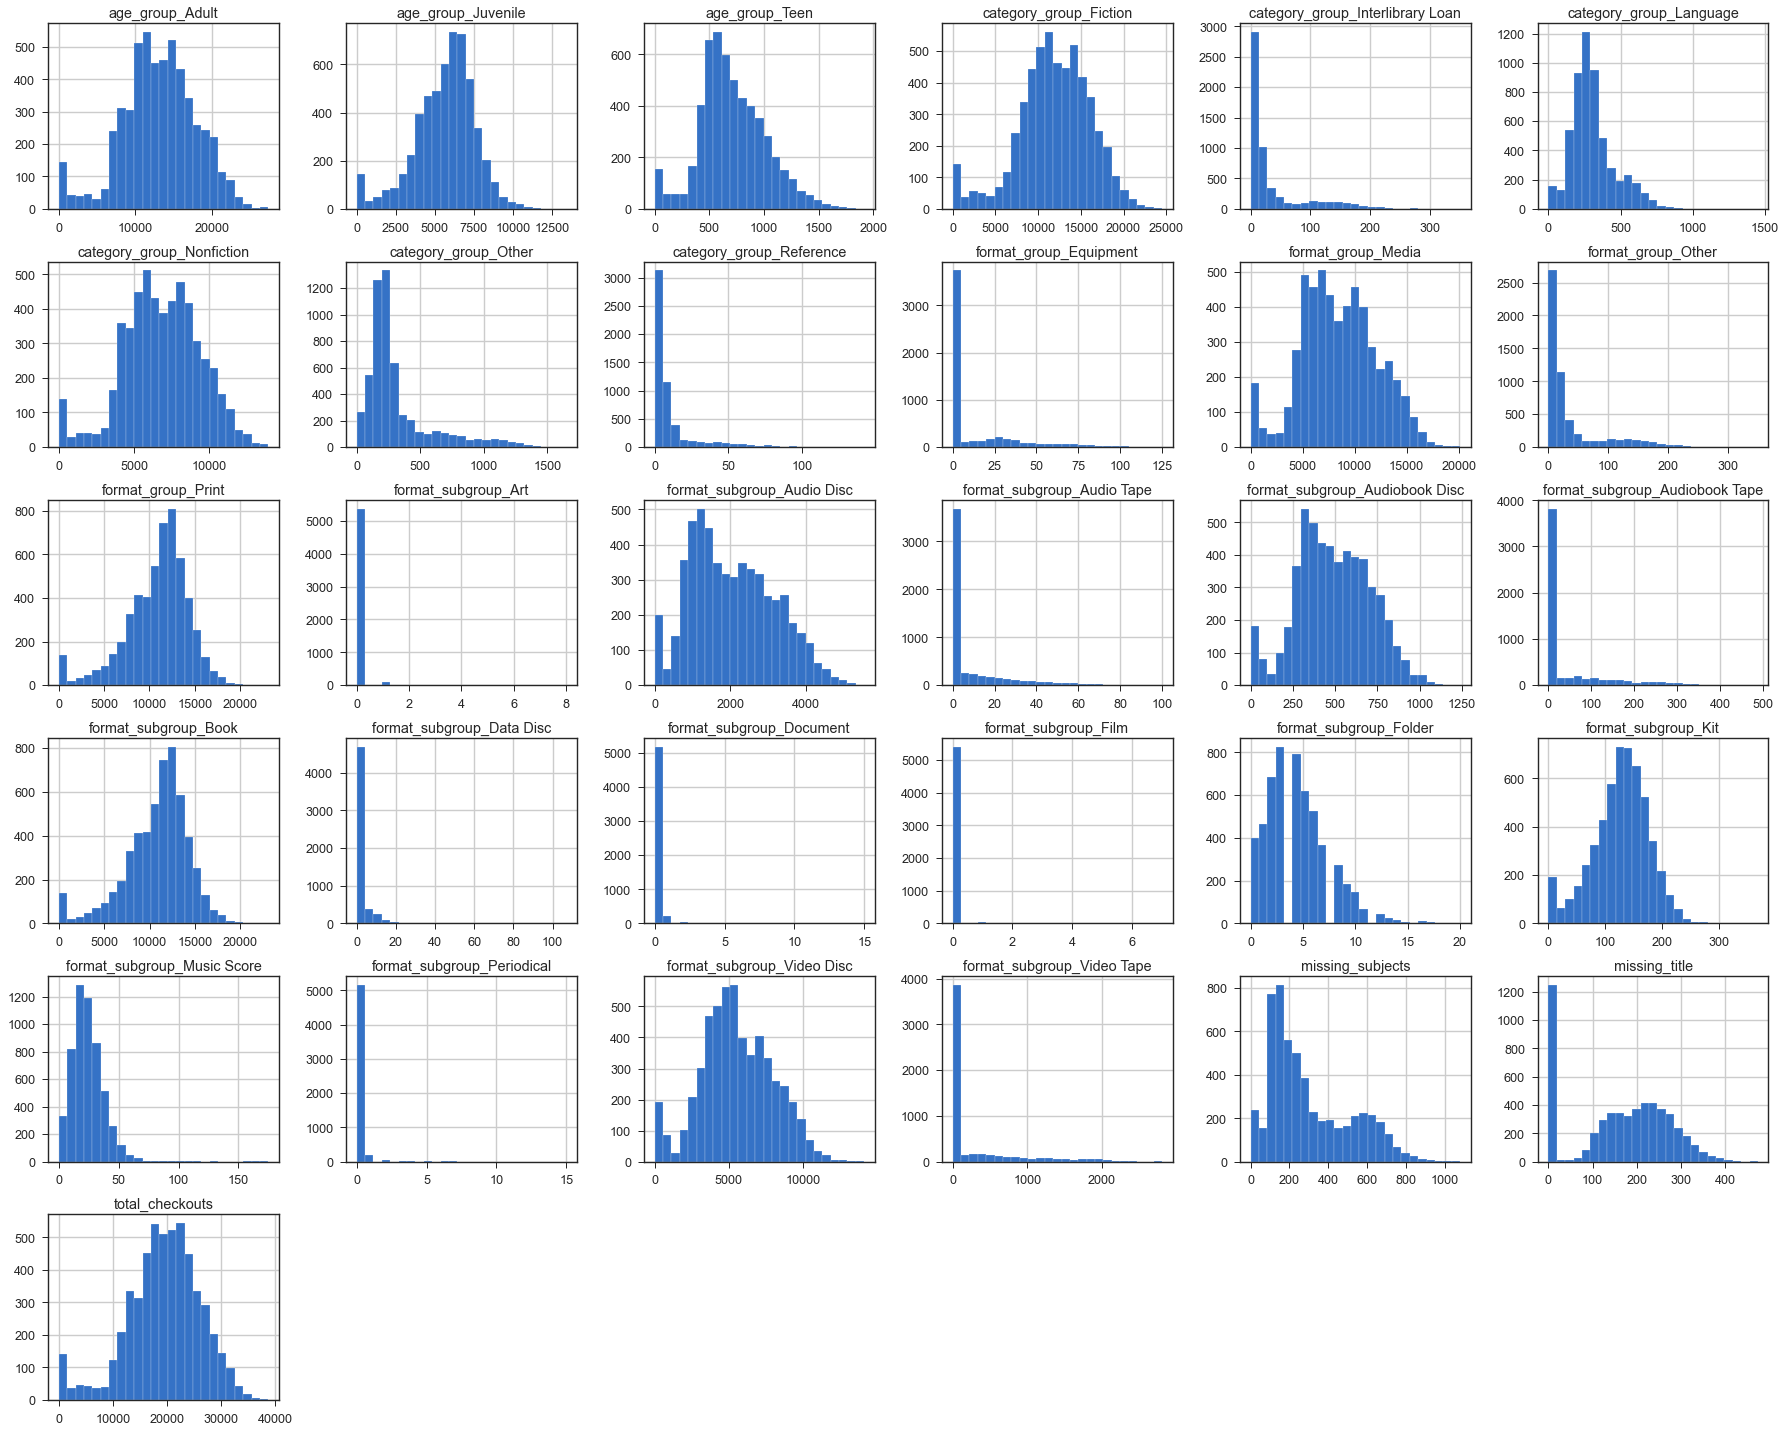

In [56]:
# histograms of every column, after removing one outlier
df_counts[df_counts.total_checkouts < 100000].hist(bins=25, figsize=(25,20))

plt.tight_layout()

plt.show()

- Many of the columns are fairly normally distributed, including the all-important `total_checkouts` column, which will be the basis of my time series analysis.
- There is a big spike in observations toward the very left of `total_checkouts` (toward 0), so I'll investigate that a little further here, first by looking at how many days had fewer than 100 checkouts.

In [57]:
# number of days with fewer than 100 checkouts
below100 = df_counts[df_counts.total_checkouts < 100].shape[0]
below100

115

In [58]:
# as a percentage
round(below100 / len(df_counts) * 100, 1)

2.1

- There were 115 days with fewer than 100 checkouts, which I'll have to investigate further.
    - Since libraries are generally closed on Sunday, one might expect this number to actually be higher, as there should be over 800 Sundays represented in the data. this must not merely be populated by Sundays (presumably a day on which the library is closed).
    - This accounts for 2.1% of the data.
- I'm curious to know how many of these occurred after the pandemic/lockdowns.

In [59]:
# number of days with fewer than 100 checkouts, in 2020
below100_2020 = df_counts[(df_counts.total_checkouts < 100) & (df_counts.index > '2020-03-01')].shape[0]
below100_2020

57

In [60]:
# as a percentage of days with fewer than 100 checkouts across all years
round(below100_2020 / below100 * 100, 1)

49.6

- Almost half of these days (57 days, or 49.6%) with very little activity occurred after March of 2020, which is no doubt a result of the pandemic.
- I'll double check there are no current NaN values.

In [216]:
# number of nans per column
pd.DataFrame(df_counts.isna().sum()).T

total_checkouts  missing_title  missing_subjects  format_group_Equipment  \
0                0              0                 0                       0   

   format_group_Media  format_group_Other  format_group_Print  \
0                   0                   0                   0   

   format_subgroup_Art  format_subgroup_Audio Disc  \
0                    0                           0   

   format_subgroup_Audio Tape  format_subgroup_Audiobook Disc  \
0                           0                               0   

   format_subgroup_Audiobook Tape  format_subgroup_Book  \
0                               0                     0   

   format_subgroup_Data Disc  format_subgroup_Document  format_subgroup_Film  \
0                          0                         0                     0   

   format_subgroup_Folder  format_subgroup_Kit  format_subgroup_Music Score  \
0                       0                    0                            0   

   format_subgroup_Periodical  format_subgroup_Video Disc  \
0                           0                           0   

   format_subgroup_Video Tape  category_group_Fiction  \
0                           0                       0   

   category_group_Interlibrary Loan  category_group_Language  \
0                                 0                        0   

   category_group_Nonfiction  category_group_Other  category_group_Reference  \
0                          0                     0                         0   

   age_group_Adult  age_group_Juvenile  age_group_Teen  
0                0                   0               0

- It appears as if there are no NaN values in the current dataset, but I'll need to see if there are any days that are missing from the DataFrame entirely.
    - I've already checked if there are currently any NaN values, but haven't yet check if there are any days that simply aren't in the dataset.
    
### Check for missing values

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

- There should be 263 days for 2005, since the data begins on April 13.
- There should be 349 days for 2020, since the data ends on December 14.
- All other years should have 365 or 366 days depend on if it's a leap year.

In [217]:
# number of days per year
df_counts.groupby(df_counts.index.year).size()

date
2005    248
2006    363
2007    364
2008    364
2009    353
2010    351
2011    351
2012    347
2013    356
2014    358
2015    352
2016    356
2017    355
2018    354
2019    354
2020    244
dtype: int64

Ouch! There are certainly missing values. I'll add in those missing days and fill their columns with NaN values.

In [218]:
# full range of days
idx = pd.date_range('2005-04-13', '2020-12-14')

# use full range and impute NaNs for missing days
df_counts = df_counts.reindex(idx, fill_value=np.nan)

In [219]:
# check new shape
df_counts.shape

(5725, 31)

In [220]:
# number of days per year
df_counts.groupby(df_counts.index.year).size()

2005    263
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    349
dtype: int64

In [221]:
# number of nans per column
pd.DataFrame(df_counts.isna().sum()).T

total_checkouts  missing_title  missing_subjects  format_group_Equipment  \
0              255            255               255                     255   

   format_group_Media  format_group_Other  format_group_Print  \
0                 255                 255                 255   

   format_subgroup_Art  format_subgroup_Audio Disc  \
0                  255                         255   

   format_subgroup_Audio Tape  format_subgroup_Audiobook Disc  \
0                         255                             255   

   format_subgroup_Audiobook Tape  format_subgroup_Book  \
0                             255                   255   

   format_subgroup_Data Disc  format_subgroup_Document  format_subgroup_Film  \
0                        255                       255                   255   

   format_subgroup_Folder  format_subgroup_Kit  format_subgroup_Music Score  \
0                     255                  255                          255   

   format_subgroup_Periodical  format_subgroup_Video Disc  \
0                         255                         255   

   format_subgroup_Video Tape  category_group_Fiction  \
0                         255                     255   

   category_group_Interlibrary Loan  category_group_Language  \
0                               255                      255   

   category_group_Nonfiction  category_group_Other  category_group_Reference  \
0                        255                   255                       255   

   age_group_Adult  age_group_Juvenile  age_group_Teen  
0              255                 255             255

- I now have a dataset in which each day is accounted for; I filled in 255 days for which there was no information, imputing NaN values into every column for now.

### Investigate missing values

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

- Is there a particular year with a lot of missing values?
- Is there a particular day of the week with a lot of missing values?

#### Missing values by year

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

In [222]:
# dataframe of missing dates 
nan_vals = df_counts[df_counts.total_checkouts.isna()]

In [223]:
# create a year column (easier to call for groupby)
nan_vals['year'] = nan_vals.index.year

# missing days by year
days_missing_year = nan_vals.groupby('year').size()
days_missing_year

year
2005     15
2006      2
2007      1
2008      2
2009     12
2010     14
2011     14
2012     19
2013      9
2014      7
2015     13
2016     10
2017     10
2018     11
2019     11
2020    105
dtype: int64

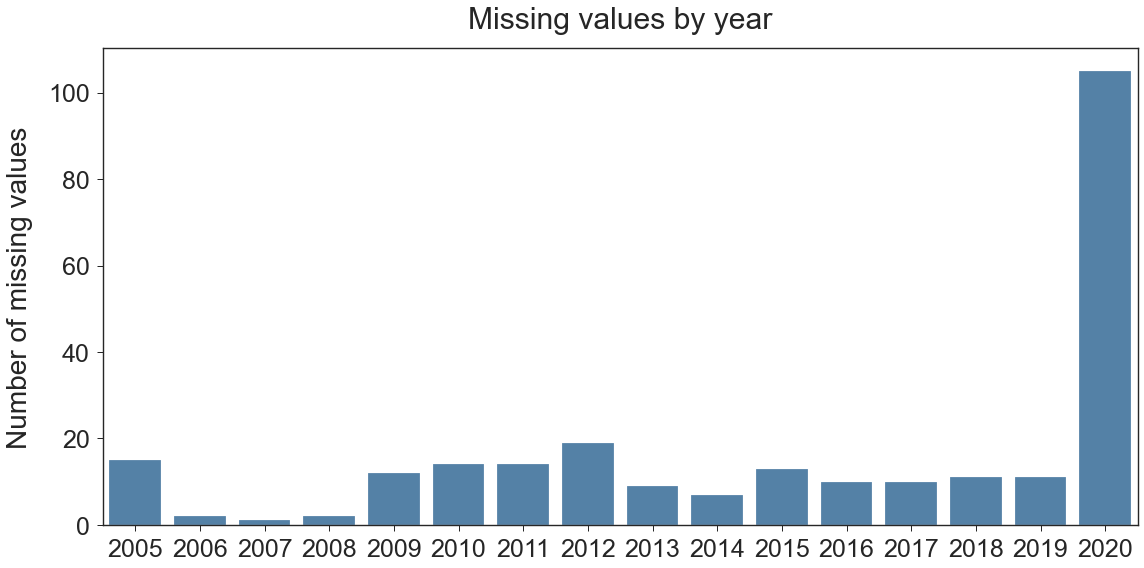

In [224]:
# create labels and prettify the plot
plt.figure(figsize=(16,8))
plt.title('Missing values by year', 
          fontsize=30, pad=20)

# plot counts
sns.barplot(days_missing_year.index, days_missing_year.values, color='steelblue')

# plt.xlabel('Format', fontsize=28, labelpad=15)
plt.ylabel('Number of missing values', fontsize=28, labelpad=15)
plt.yticks(fontsize=25)
plt.xlabel('')
plt.xticks(fontsize=25)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/missing_values_year_bar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- While each year does have missing values, all but 2020 have fewer than 19 days.
    - In the case of the leap year 2012, which has 19 missing days, that is about 5.2% of the data.
- It is important to note, however, that the data for 2005 is only partial, as it starts on April 13 of that year (thus having 263 days), so the percentage of missing values is slightly higher for that year (~5.7% of the data for that year). 
- There are 105 missing values for 2020! Given the pandemic, this is hardly surprising.
    - Missing values account for ~30.1% of the data in 2020!
    - *Note: 2020 data is also partial, ending on December 14, and should total 349 days.*
- Next, I'll take a look at the distribution of missing values for each day of the week by year.

#### Missing values by day of week

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

In [226]:
# column with name of day
nan_vals['day'] = nan_vals.index.day_name()

# missing days by day of week
days_missing_day = nan_vals.groupby('day').size()
days_missing_day

day
Friday       31
Monday       69
Saturday     29
Sunday       37
Thursday     35
Tuesday      27
Wednesday    27
dtype: int64

In [231]:
# list of days in order
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# reorder data for graph by week order
day_missing_values = [days_missing_day[day] for day in days]

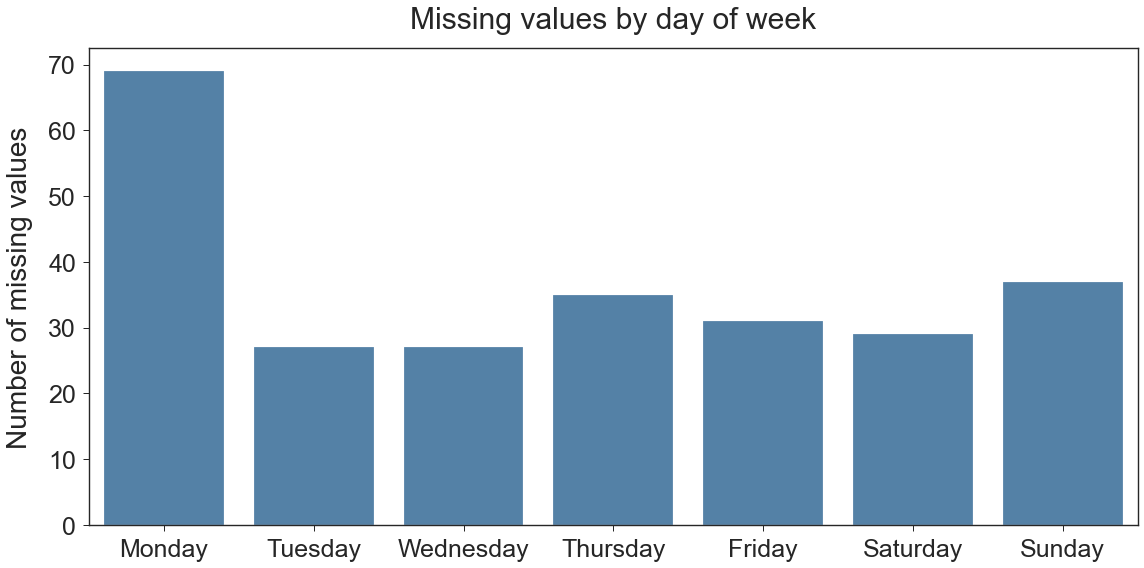

In [228]:
# create labels and prettify the plot
plt.figure(figsize=(16,8))
plt.title('Missing values by day of week', 
          fontsize=30, pad=20)

# plot counts
sns.barplot(days, day_missing_values, color='steelblue')

# plt.xlabel('Format', fontsize=28, labelpad=15)
plt.ylabel('Number of missing values', fontsize=28, labelpad=15)
plt.yticks(fontsize=25)
plt.xlabel('')
plt.xticks(fontsize=25)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/missing_values_day_bar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- Most of the missing values occur on Mondays, which may make sense if that is also a normally closed day in Seattle libraries.
- A fair amount of missing values for every other day as well.
- I'll have to figure out what to do with those, perhaps imputing the mean for the given year, or using the previous or following week's value.
- I'm curious how the distribution of missing values relates to day of the week *and* the year.

#### Missing values by day of week *and* year

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

In [229]:
# group by day and year
nan_vals_grouped = nan_vals.groupby(['day', 'year']).size()

# look at an example
nan_vals_grouped['Monday']

year
2005     3
2006     1
2009     2
2010     4
2011     4
2012     6
2013     4
2014     3
2015     2
2016     4
2017     5
2018     6
2019     5
2020    20
dtype: int64

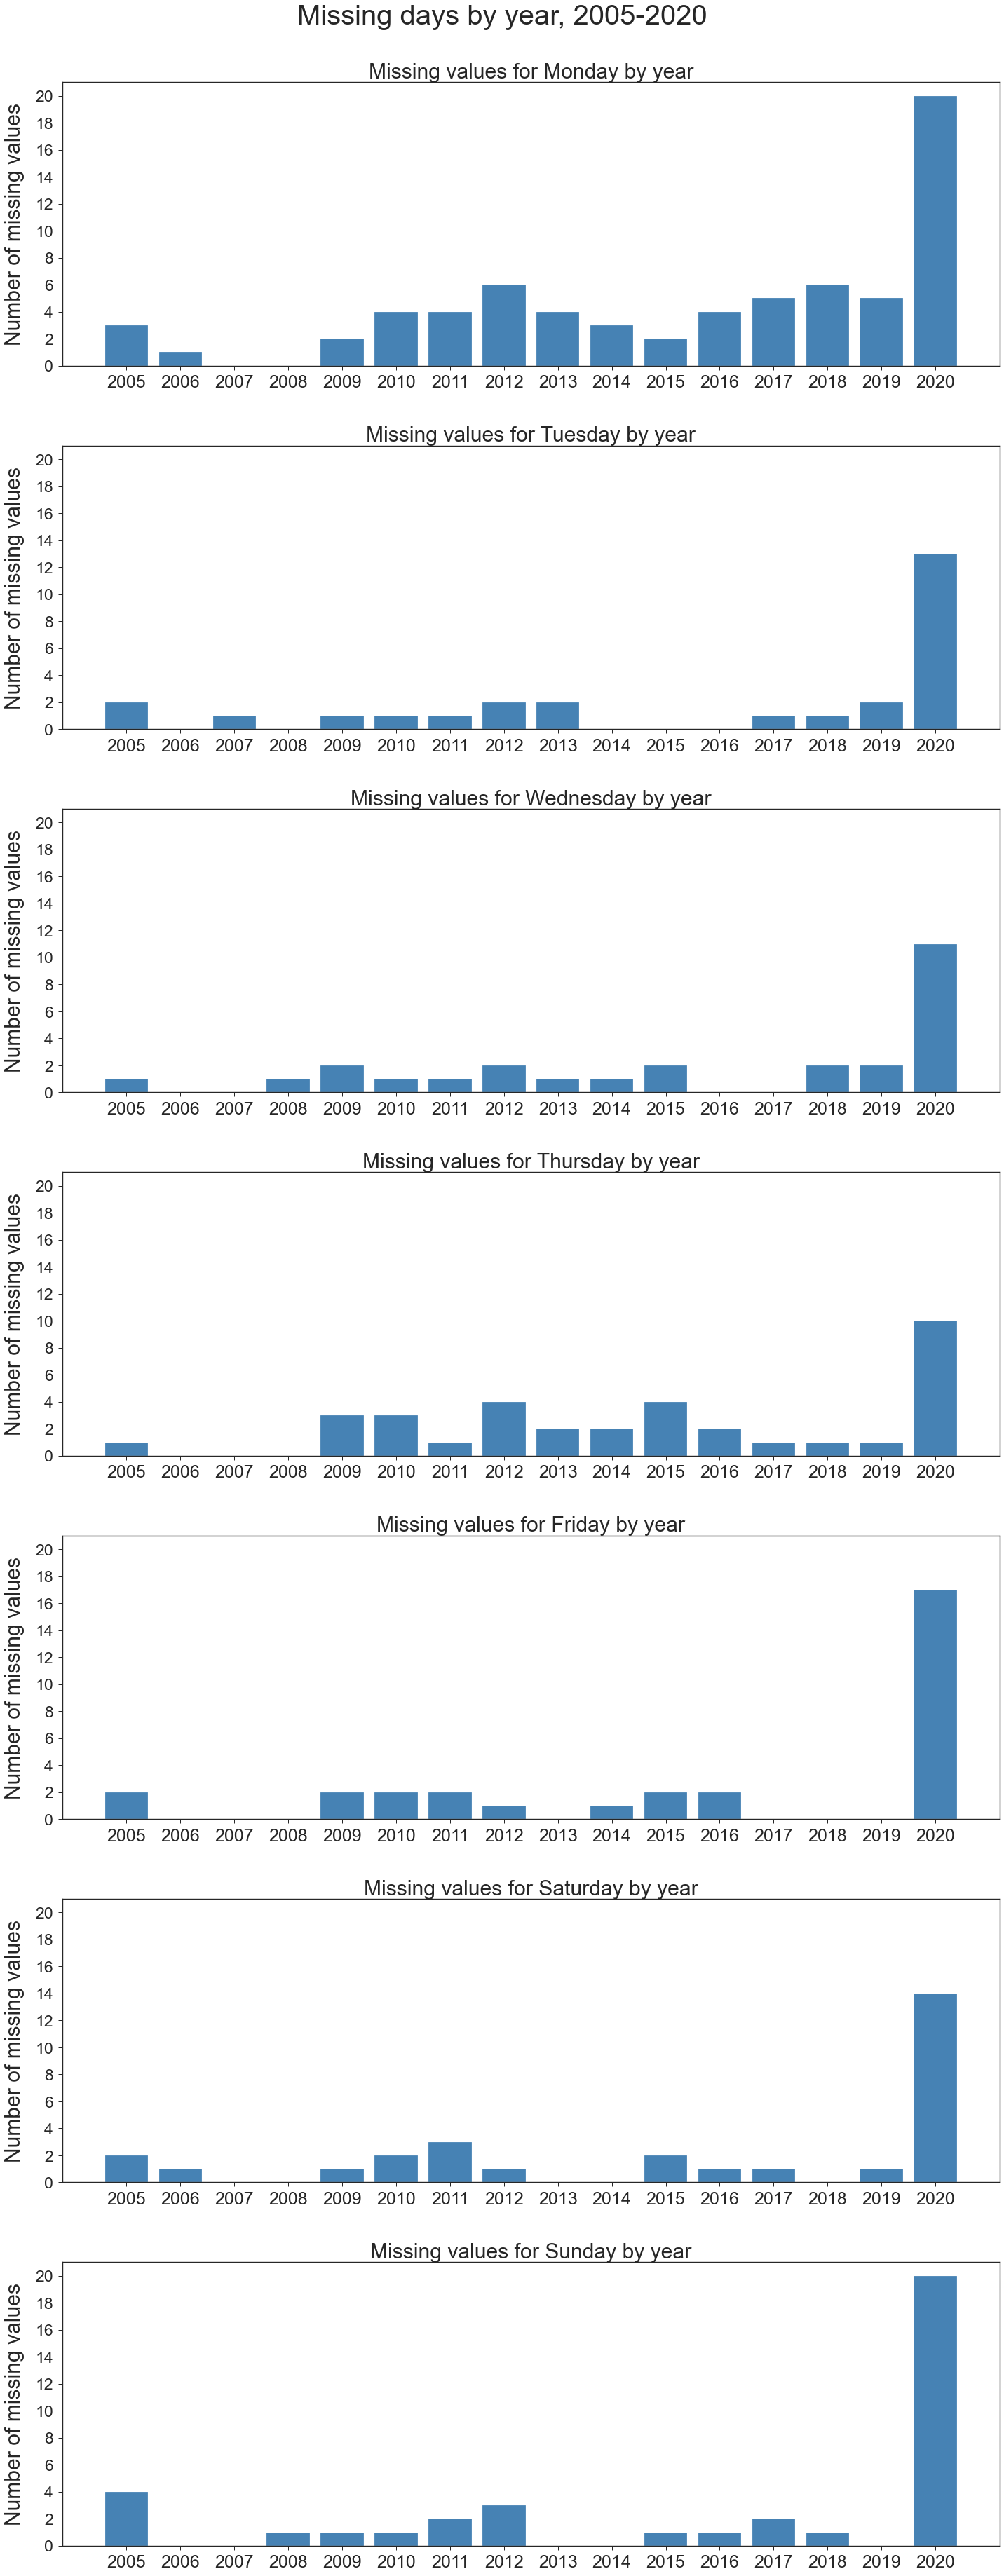

In [230]:
# instantiate figure
plt.figure(figsize=(20,50))

# set dimension of plots
nrows = 7
ncols = 1

# set title for entire figure
plt.suptitle('Missing days by year, 2005-2020', fontsize=40, y=1.02)

# for loop to visualize the health breakdown of these binary variables
for i, day in enumerate(days):

    day_missing_year = nan_vals_grouped[day]
    
    # plot
    plt.subplot(nrows, ncols, i+1)
    plt.title(f'Missing values for {day} by year', fontsize=30, x=0.5, y=1)
    plt.ylabel('Number of missing values', fontsize=30, labelpad=15)
    plt.xticks(ticks=[year for year in range(2005,2021)], labels=[year for year in range(2005,2021)], fontsize=25)
    plt.yticks(ticks=range(0,21,2), labels=range(0,21,2), fontsize=23)
    plt.ylim(bottom=0, top=21)
    plt.bar(day_missing_year.index, day_missing_year.values, color='steelblue')

# prepare to save and display
plt.tight_layout(h_pad=5)

# uncomment to save
plt.savefig('charts/missing_values_day_x_year_bar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- 2020 is consistently full of the most missing values for each day of the week, by far.
- For days other than Mondays, there are fewer than 4 missing values per year.

I'll eventually have to impute values in place of these NaNs, but for now, I'll look at the data that I actually have.

### Day of the week

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

In [232]:
# column with name of day
df_counts['day'] = df_counts.index.day_name()

# take a look
df_counts.day.head()

2005-04-13    Wednesday
2005-04-14     Thursday
2005-04-15       Friday
2005-04-16     Saturday
2005-04-17       Sunday
Freq: D, Name: day, dtype: object

In [234]:
# average checkouts per day of week
day_counts_avg = df_counts.groupby('day').total_checkouts.mean()
day_counts_avg

day
Friday       16455.329098
Monday       21677.608812
Saturday     22393.324461
Sunday       11994.568502
Thursday     20590.181354
Tuesday      21385.903797
Wednesday    21825.414665
Name: total_checkouts, dtype: float64

In [235]:
# reorder using above list
day_avg_values = [day_counts_avg[day] for day in days]

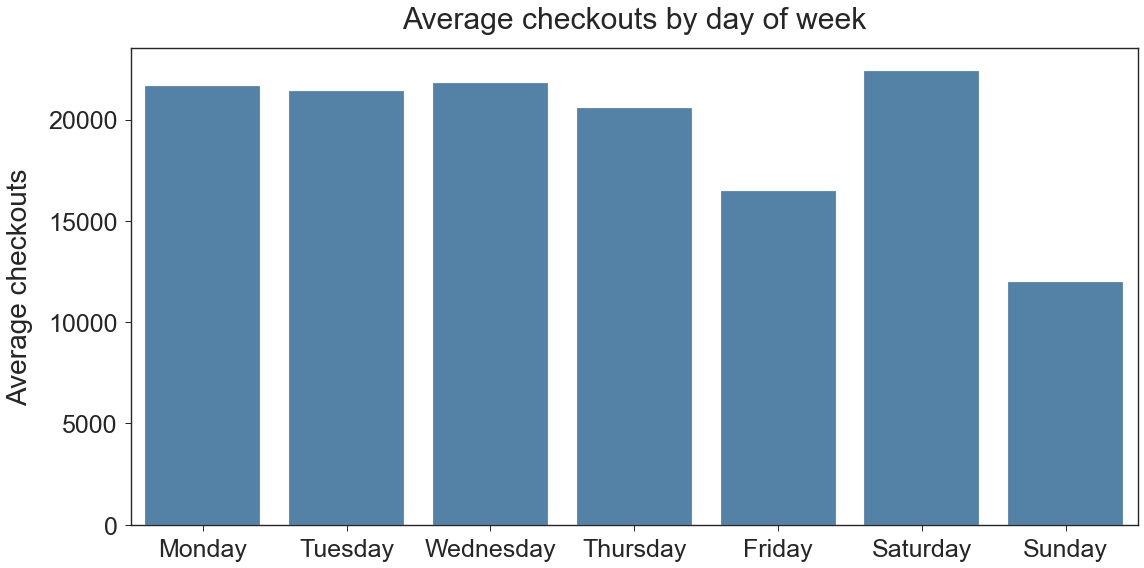

In [236]:
# create labels and prettify the plot
plt.figure(figsize=(16,8))
plt.title('Average checkouts by day of week', 
          fontsize=30, pad=20)

# plot counts
sns.barplot(days, day_avg_values, color='steelblue')

# plt.xlabel('Format', fontsize=28, labelpad=15)
plt.ylabel('Average checkouts', fontsize=28, labelpad=15)
plt.yticks(fontsize=25)
plt.xlabel('')
plt.xticks(fontsize=25)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/average_checkouts_day_bar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- Each day of the week has fairly similar numbers of average checkouts, other than Friday and Sunday, which appear much lower.
- I wonder if this changes over time. I'll look at these averages for each year.

In [237]:
# average checkouts by year and day
day_counts_avg_yearly = df_counts.groupby([df_counts.index.year, 'day']).total_checkouts.mean()

# reformat
day_counts_avg_yearly_unstack = day_counts_avg_yearly.unstack()[days]
day_counts_avg_yearly_unstack

day         Monday       Tuesday     Wednesday      Thursday        Friday  \
2005  16950.970588  17304.200000  19176.567568  15331.783784  15879.555556   
2006  17541.901961  19134.903846  22869.269231  20063.846154  19089.634615   
2007  18191.301887  20705.431373  23461.865385  22185.480769  19975.673077   
2008  22363.923077  24071.716981  29255.596154  25379.730769  22318.230769   
2009  26115.300000  27970.607843  31733.400000  28121.020000  25026.460000   
2010  29334.291667  28724.843137  27146.980392  25966.183673  16830.745098   
2011  26314.229167  26904.666667  25214.725490  23672.745098  15890.380000   
2012  25970.063830  24570.700000  22809.940000  22572.770833  15612.078431   
2013  25905.270833  23772.470588  22475.980392  23098.500000  16485.692308   
2014  24622.775510  21791.826923  21431.730769  21704.380000  15526.098039   
2015  22477.740000  21211.826923  20784.840000  20036.877551  14542.440000   
2016  20609.541667  19364.365385  18636.096154  18752.180000  13834.019608   
2017  20160.106383  19221.000000  18328.596154  18147.431373  13862.980769   
2018  19438.085106  18343.039216  17825.980000  17354.450980  13731.846154   
2019  17968.851064  17384.980392  17502.460000  16468.254902  12789.557692   
2020   5741.466667   5898.611111   6094.692308   6472.275000   9229.636364   

day       Saturday        Sunday  
2005  15601.638889   5401.484848  
2006  19812.843137   8499.924528  
2007  21783.538462  10129.807692  
2008  25189.442308  12242.745098  
2009  27055.843137  13327.058824  
2010  29052.280000  11455.137255  
2011  25782.040000  11453.840000  
2012  24870.666667  11227.720000  
2013  26779.615385  16488.750000  
2014  24935.326923  15174.057692  
2015  23229.280000  14413.509804  
2016  21160.903846  13647.784314  
2017  20257.941176  12811.098039  
2018  19855.442308  12719.647059  
2019  18811.980392  12174.269231  
2020   7988.861111   5906.366667

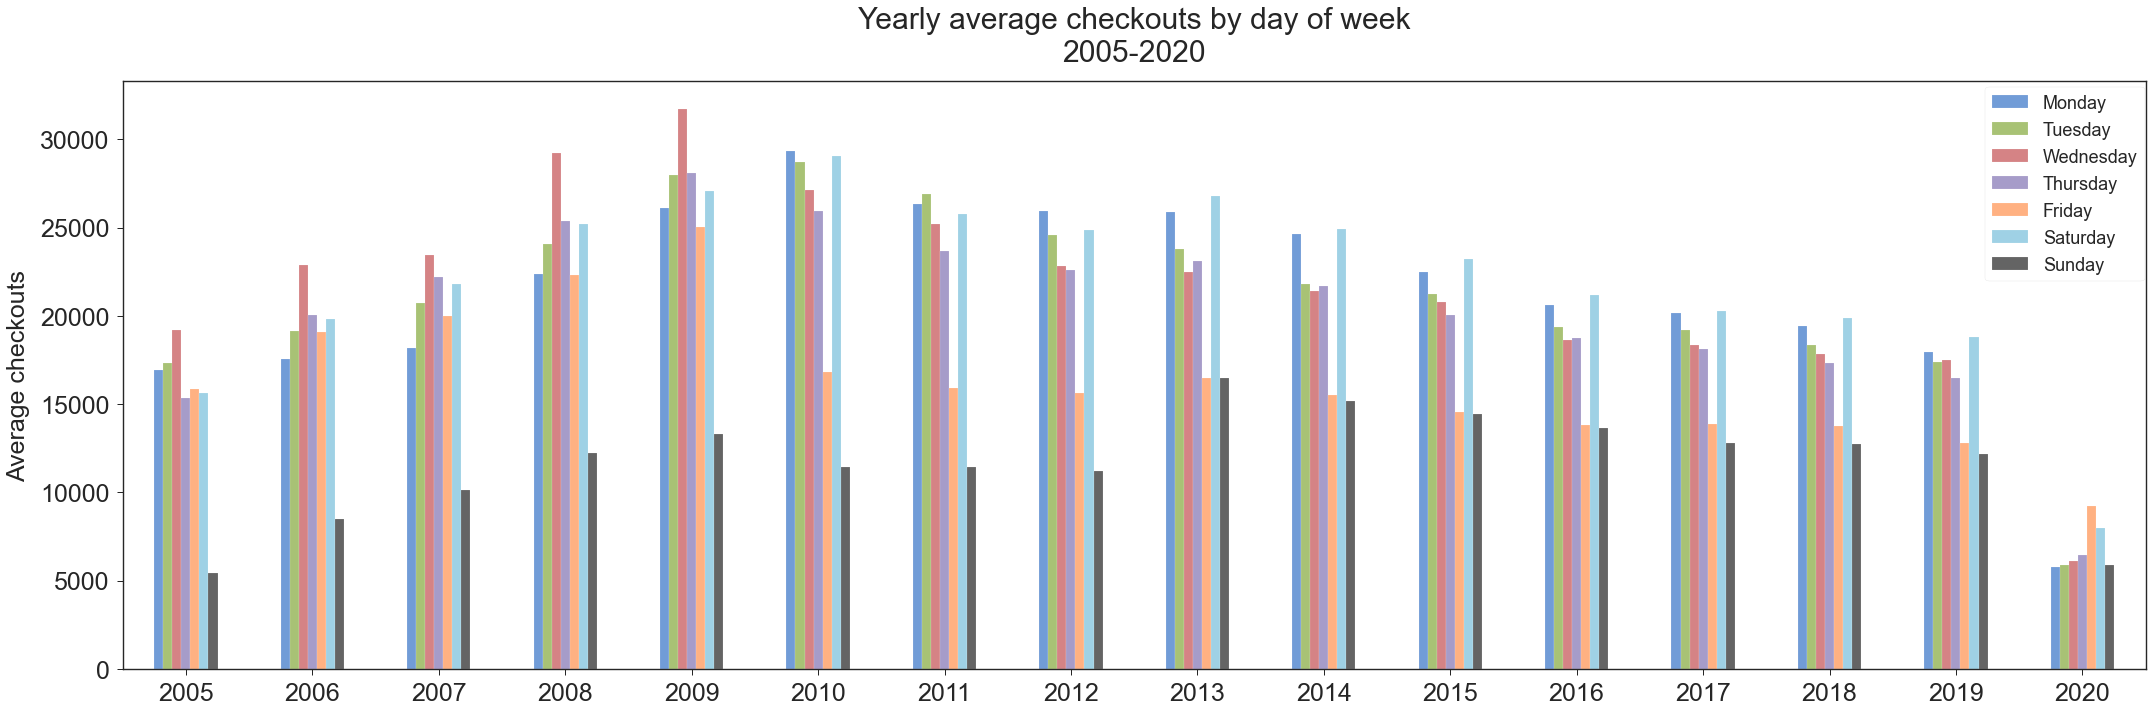

In [238]:
# plot the graph
day_counts_avg_yearly_unstack.plot(kind='bar',
    figsize=(30,10), 
    alpha=.70, fontsize=14)

# prettify the graph
plt.title('Yearly average checkouts by day of week\n2005-2020', 
          fontsize=30, pad=20)
plt.ylabel('Average checkouts', fontsize=25, labelpad=10)
plt.yticks(fontsize=25)
plt.xlabel('')
plt.xticks(fontsize=25, rotation=0)
plt.legend(days, facecolor='white', 
           framealpha=1, bbox_to_anchor=(1.004, 1.005), 
           fontsize=18)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/yearly_weekday_average_bar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- Wednesday is the top day between 2005-2009.
- Friday plays a strong role in those years as well.
    - It declines signficantly in 2010 and stays at that relative level.
    - Until 2020 when it becomes the top day on average
- Monday and Saturday are consistently toward the top from 2010 onward.
- Sunday is consistently the lowest day on average, although in 2020 it is comparatively similar to most other days (besides Friday and Saturday).


- I'll now start to graph checkouts across time, starting with raw counts for the entire stretch (2005-2020).

### 2005-2020, overall

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

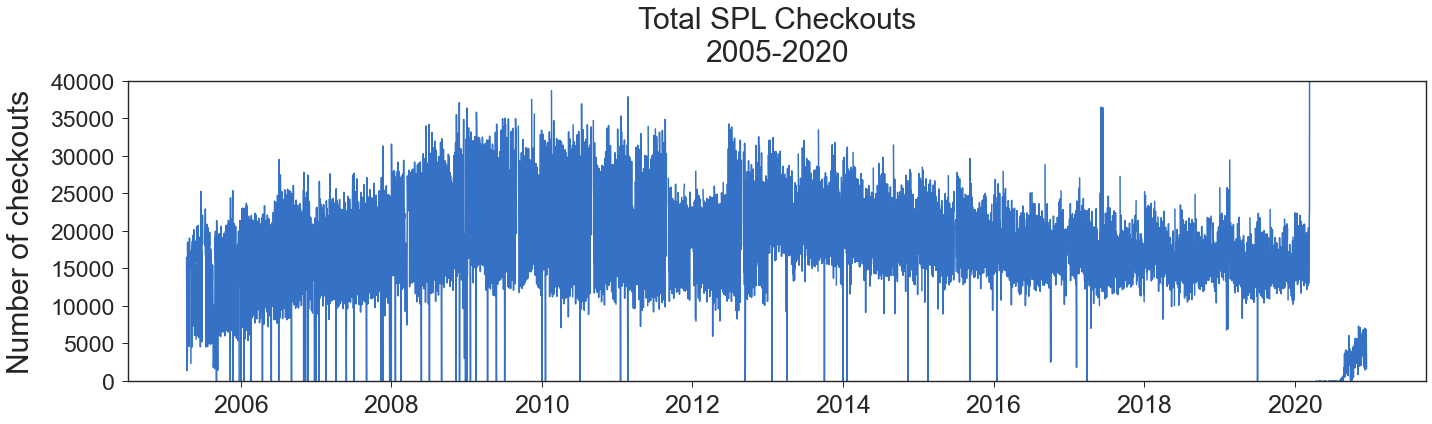

In [239]:
# instantiate figure
plt.figure(figsize=(20,6))

# prettify plot
plt.title(f'Total SPL Checkouts\n2005-2020', fontsize=30, pad=20)
plt.ylabel('Number of checkouts', fontsize=30, labelpad=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=23)
plt.ylim(bottom=0, top=40000)

# plot
plt.plot(df_counts.total_checkouts)

# prepare to save and display
plt.tight_layout()

# # uncomment to save
plt.savefig('charts/total_checkouts_line.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- As mentioned earlier, more investigation will need to be done regarding the irregular and intermittent dips down toward 0 before 2020.
    - Note: these are *not* caused by the recently added NaN rows, as there are no points (and adjoining lines) associated with those dates in the above graph.
- Overall, the number of checkouts seems fairly consistent throughout the years, before the pandemic, peaking around 2009-2010.
    - There is a gradual trend of increasing checkouts between 2006 and 2010, and a gradual decrease after 2010.
- There is an interestingly "tighter range" toward the end of 2011 and the beginning of 2012.
- To get a sense of any larger trends, I'll look at bar graph of each year's total count, starting with 2006, since that is the first *complete* year in the data.

In [240]:
# total checkouts by year
year_totals = df_counts.groupby(df_counts.index.year).total_checkouts.agg('sum')
year_totals[1:]

2006    6575786.0
2007    7092007.0
2008    8374541.0
2009    9035838.0
2010    8425046.0
2011    7784795.0
2012    7299124.0
2013    7864260.0
2014    7416879.0
2015    6871626.0
2016    6404830.0
2017    6213798.0
2018    6020702.0
2019    5703704.0
2020    1650546.0
Name: total_checkouts, dtype: float64

In [241]:
# descriptive stats
year_totals[1:].describe()

count    1.500000e+01
mean     6.848899e+06
std      1.727544e+06
min      1.650546e+06
25%      6.309314e+06
50%      7.092007e+06
75%      7.824528e+06
max      9.035838e+06
Name: total_checkouts, dtype: float64

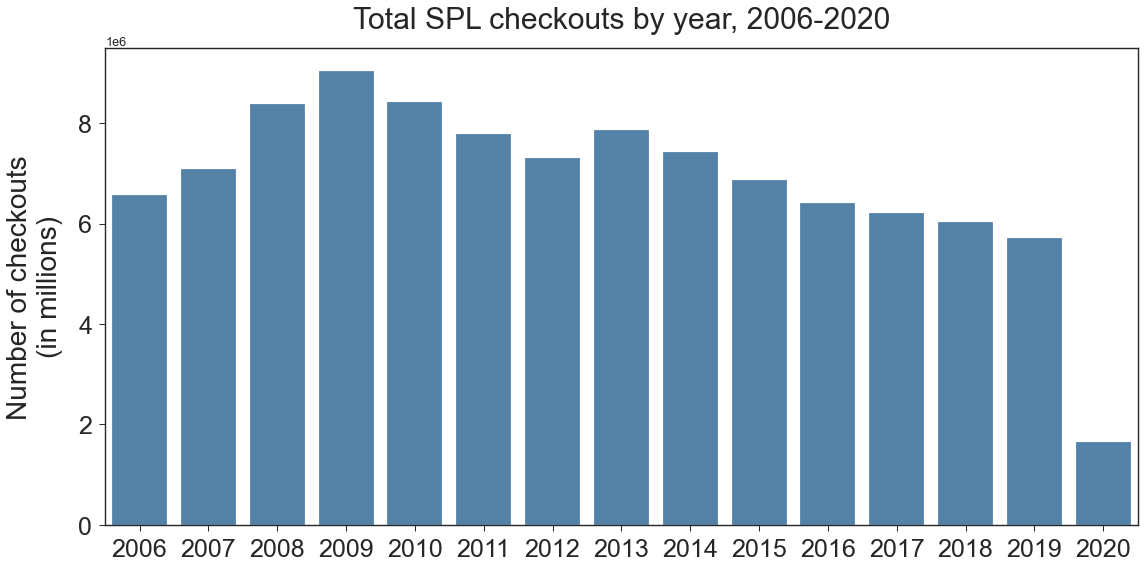

In [242]:
# create labels and prettify the plot
plt.figure(figsize=(16,8))
plt.title('Total SPL checkouts by year, 2006-2020', 
          fontsize=30, pad=20)

# plot counts
sns.barplot(year_totals[1:].index, year_totals[1:].values, color='steelblue')

# plt.xlabel('Format', fontsize=28, labelpad=15)
plt.ylabel('Number of checkouts\n(in millions)', fontsize=28, labelpad=15)
plt.yticks(fontsize=25)
plt.xlabel('')
plt.xticks(fontsize=25)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/total_checkouts_yearly_bar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- Indeed, outside of 2020, the numbers appear *fairly* consistent.
- 2008-2010 were the only years to receive over 8 million checkouts.
- There appears to be a fairly steady decline after 2013, with 2019 being the first year checkouts totaled fewer than 6 million.
- The impact of the pandemic is unsurprisingly huge.

### 2005-2020, yearly

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

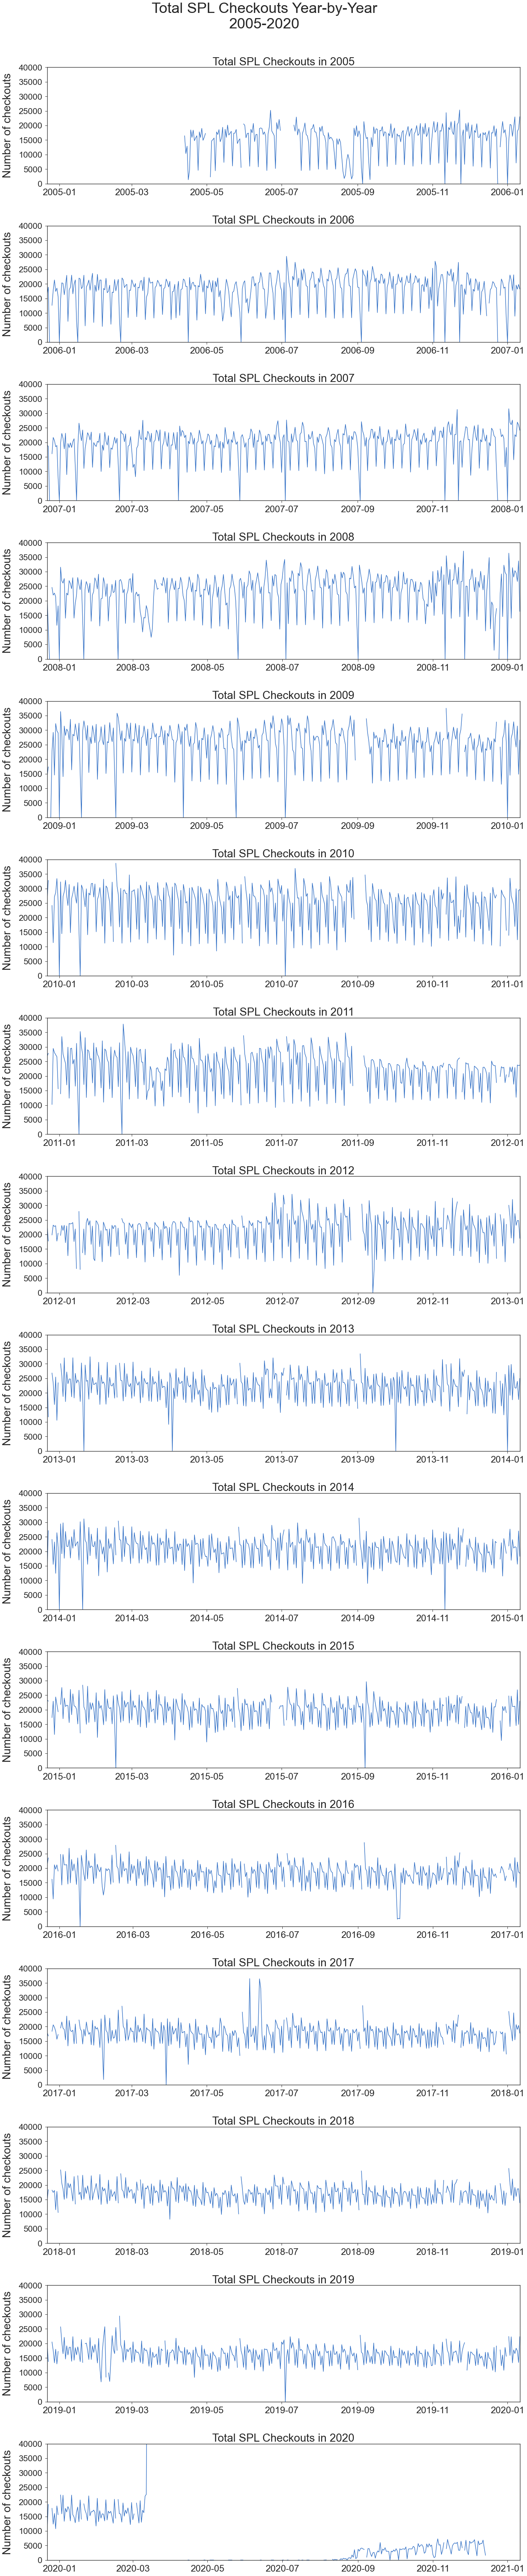

In [243]:
# instantiate figure
plt.figure(figsize=(20,95))

# set dimension of plots
nrows = 16
ncols = 1

# set title for entire figure
plt.suptitle('Total SPL Checkouts Year-by-Year\n2005-2020', fontsize=40, y=1.02)

# 10 days object, so i can add that to either side of the graph for a better view of the full year
buffer = pd.to_timedelta(10, unit='days')

# for loop to visualize the health breakdown of these binary variables
for i, year in enumerate(range(2005,2021)):
    
    begin = pd.to_datetime(f'{year}-01-01') - buffer
    end = pd.to_datetime(f'{year+1}-01-01') + buffer
    
    counts = df_counts[begin:end].total_checkouts
    
    # plot
    plt.subplot(nrows, ncols, i+1)
    plt.title(f'Total SPL Checkouts in {year}', fontsize=30, x=0.5, y=1)
    plt.ylabel('Number of checkouts', fontsize=30, labelpad=15)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=23)
    plt.xlim(left=begin, right=end)
    plt.ylim(bottom=0, top=40000)
    plt.plot(counts)


# prepare to save and display
plt.tight_layout(h_pad=5)

# # uncomment to save
plt.savefig('charts/total_checkouts_yearly_line.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- In the years 2006 through 2010, as well as 2019, there is an apparent dip toward 0 checkouts on July 4 (presumably), but this same phenomenon is not seen from 2011 to 2018 (*note: due to COVID-19, not applicable in 2020*).



### Equipment

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

In [244]:
# total equipment checkouts by year
equip_totals = df_counts.groupby(df_counts.index.year).format_group_Equipment.agg('sum')
equip_totals

2005       18.0
2006        0.0
2007        0.0
2008        0.0
2009        0.0
2010        0.0
2011        0.0
2012        0.0
2013        0.0
2014        4.0
2015     2441.0
2016     9348.0
2017    12357.0
2018    22565.0
2019    17514.0
2020     4964.0
Name: format_group_Equipment, dtype: float64

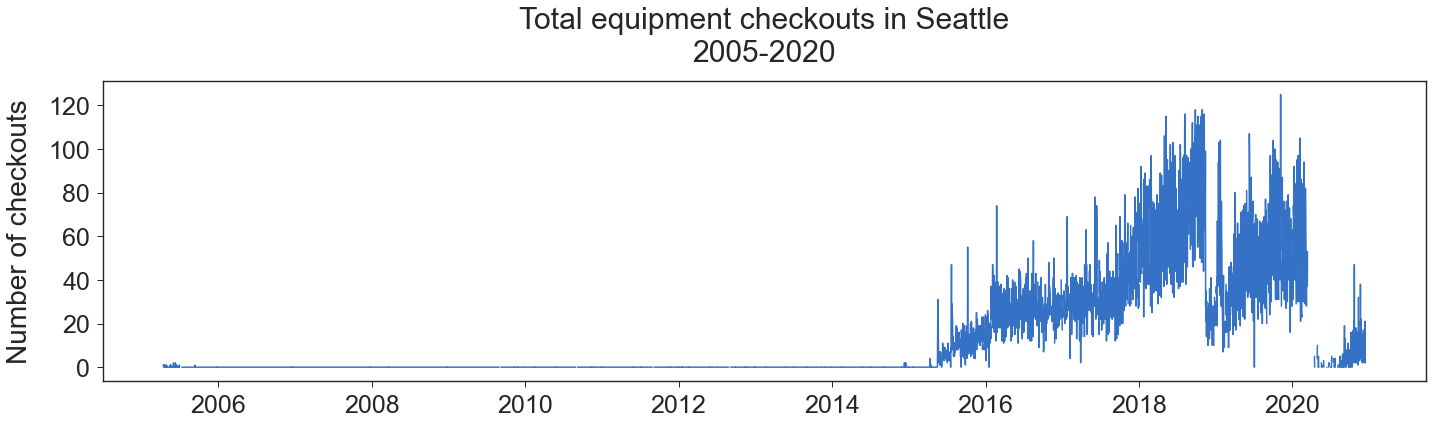

In [245]:
# create labels and prettify the plot
plt.figure(figsize=(20,6))
plt.title('Total equipment checkouts in Seattle\n2005-2020', 
          fontsize=30, pad=20)
plt.suptitle('')
# plt.xlabel('Format', fontsize=28, labelpad=15)
plt.ylabel('Number of checkouts', fontsize=28, labelpad=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# plot counts
plt.plot(df_counts.format_group_Equipment)

# prepare to save and display
plt.tight_layout()

# # uncomment to save
# plt.savefig('charts/total_checkouts.png', 
#             bbox_inches='tight', transparent=True)

plt.show()

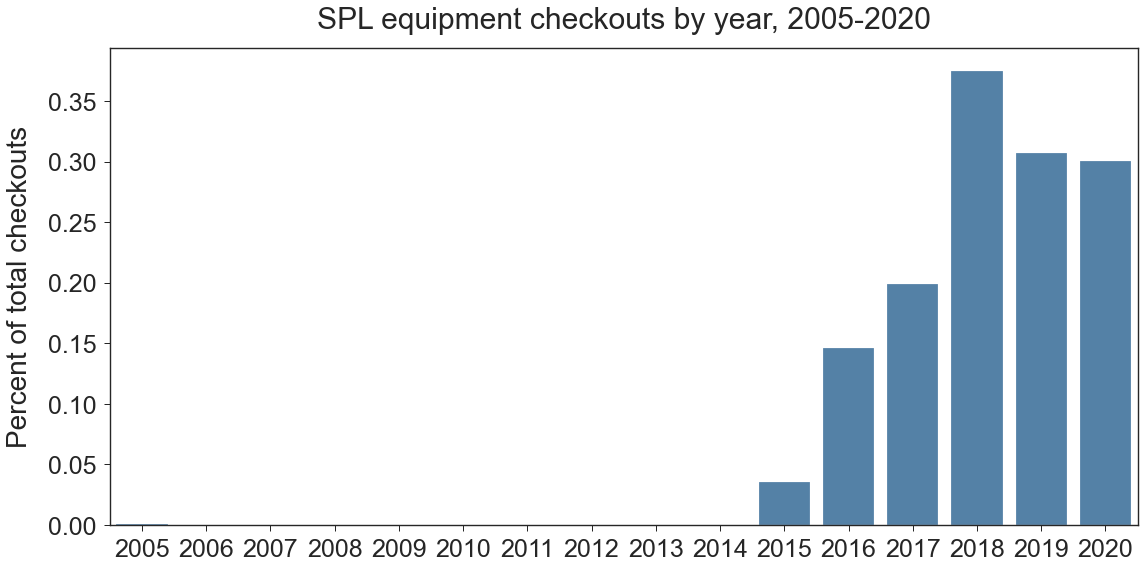

In [246]:
# create labels and prettify the plot
plt.figure(figsize=(16,8))
plt.title('SPL equipment checkouts by year, 2005-2020', 
          fontsize=30, pad=20)

# plot counts
sns.barplot(equip_pct.index, equip_pct.values, color='steelblue')

# plt.xlabel('Format', fontsize=28, labelpad=15)
plt.ylabel('Percent of total checkouts', fontsize=28, labelpad=15)
plt.yticks(fontsize=25)
plt.xlabel('')
plt.xticks(fontsize=25)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/percent_checkouts_equipment_yearly_bar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- Equipment checkouts don't begin in earnest until sometime in 2015, although it should be noted that the daily numbers are comparatively low, with the maximum number being 125. The highest yearly total only makes up roughly 0.36% of the data for that year.
- I'll take a look at year-by-year starting in 2015.

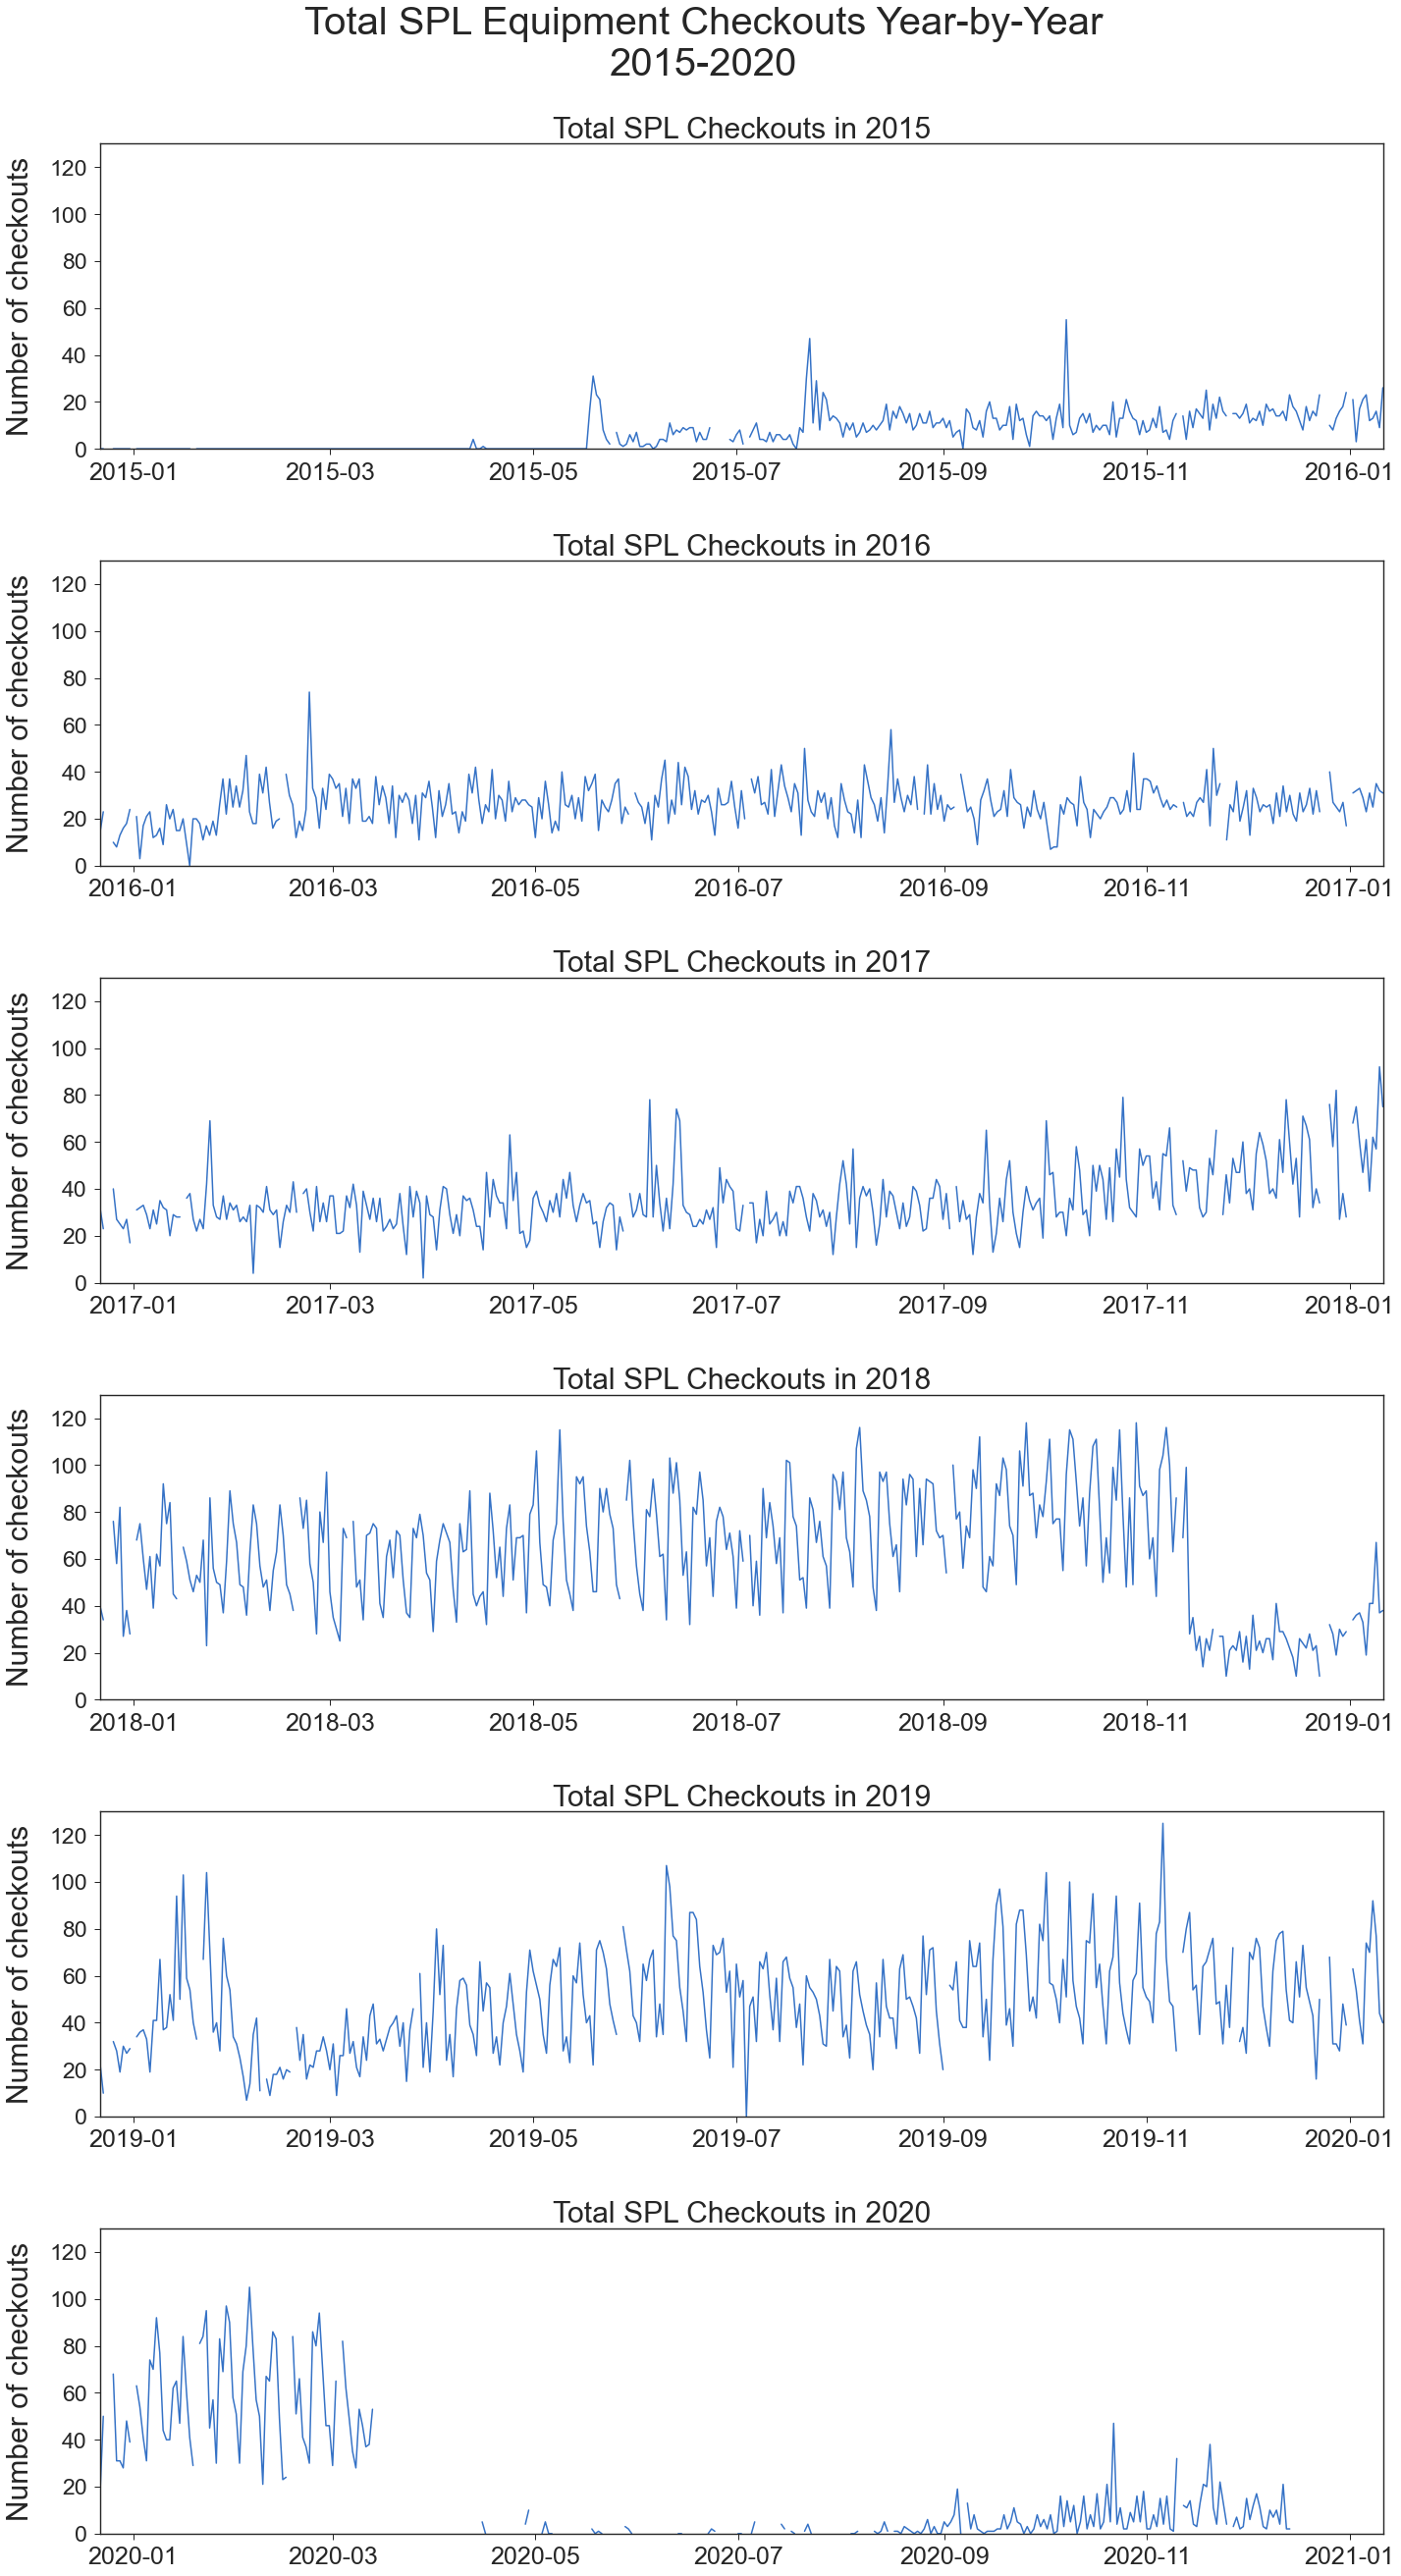

In [247]:
# instantiate figure
plt.figure(figsize=(20,35))

# set dimension of plots
nrows = 6
ncols = 1

# set title for entire figure
plt.suptitle('Total SPL Equipment Checkouts Year-by-Year\n2015-2020', fontsize=40, y=1.04)

# 10 days object, so i can add that to either side of the graph for a better view of the full year
buffer = pd.to_timedelta(10, unit='days')

# for loop to visualize the health breakdown of these binary variables
for i, year in enumerate(range(2015,2021)):
    
    begin = pd.to_datetime(f'{year}-01-01') - buffer
    end = pd.to_datetime(f'{year+1}-01-01') + buffer
    
    counts = df_counts[begin:end].format_group_Equipment
    
    # plot
    plt.subplot(nrows, ncols, i+1)
    plt.title(f'Total SPL Checkouts in {year}', fontsize=30, x=0.5, y=1)
    plt.ylabel('Number of checkouts', fontsize=30, labelpad=15)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=23)
    plt.xlim(left=begin, right=end)
    plt.ylim(bottom=0, top=130)
    plt.plot(counts)


# prepare to save and display
plt.tight_layout(h_pad=5)

# uncomment to save
plt.savefig('charts/total_checkouts_equipment_yearly_2015-2020_line.png', 
            bbox_inches='tight', transparent=True)

plt.show()

### Print vs. Media

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

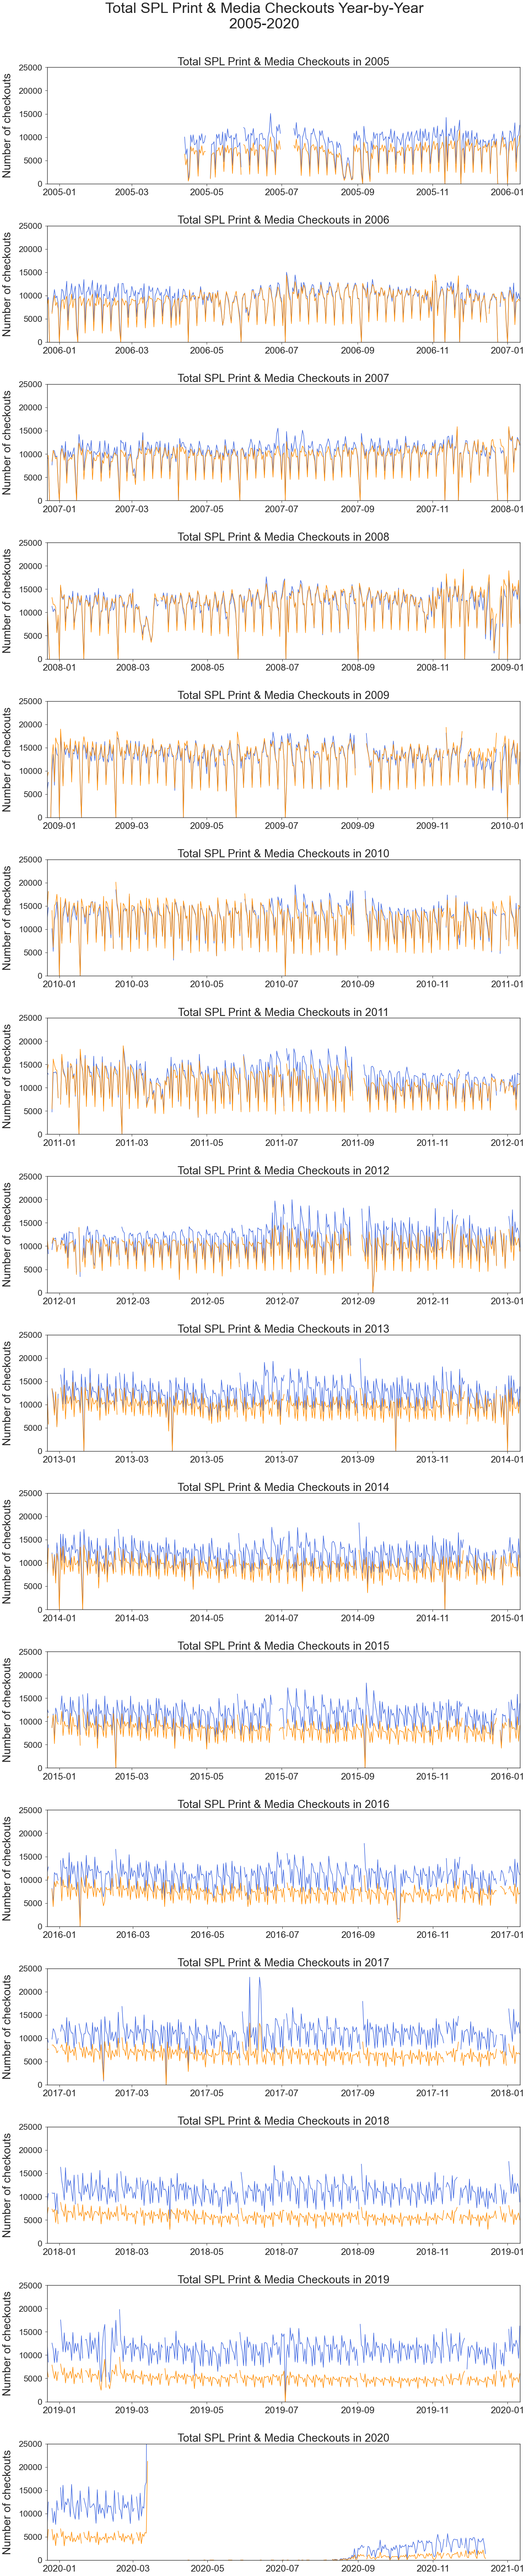

In [248]:
# instantiate figure
plt.figure(figsize=(20,95))

# set dimension of plots
nrows = 16
ncols = 1

# set title for entire figure
plt.suptitle('Total SPL Print & Media Checkouts Year-by-Year\n2005-2020', fontsize=40, y=1.02)

# 10 days object, so i can add that to either side of the graph for a better view of the full year
buffer = pd.to_timedelta(10, unit='days')

# for loop to visualize the health breakdown of these binary variables
for i, year in enumerate(range(2005,2021)):
    
    begin = pd.to_datetime(f'{year}-01-01') - buffer
    end = pd.to_datetime(f'{year+1}-01-01') + buffer
    
    counts_print = df_counts[begin:end].format_group_Print
    counts_media = df_counts[begin:end].format_group_Media
    
    # plot
    plt.subplot(nrows, ncols, i+1)
    plt.title(f'Total SPL Print & Media Checkouts in {year}', fontsize=30, x=0.5, y=1)
    plt.ylabel('Number of checkouts', fontsize=30, labelpad=15)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=23)
    plt.xlim(left=begin, right=end)
    plt.ylim(bottom=0, top=25000)
    plt.plot(counts_print, color='royalblue')
    plt.plot(counts_media, color='darkorange')
# 'darkorange', 'royalblue'

# prepare to save and display
plt.tight_layout(h_pad=5)

# uncomment to save
plt.savefig('charts/total_print_media_checkouts_yearly_2005-2020_line.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- Are Netflix and other streaming services disrupting the library's media services?

In [249]:
# total counts for print and media items
mp_totals = df_counts.groupby(df_counts.index.year)['format_group_Media','format_group_Print'].agg('sum')

# as a percent of the total checkouts by year
media_pct = mp_totals.format_group_Media / year_totals * 100
print_pct = mp_totals.format_group_Print / year_totals * 100

# convert to dataframe and take a look
mp_pct = pd.DataFrame(zip(media_pct, print_pct), columns=['Media', 'Print'], index=media_pct.index)
mp_pct

Media      Print
2005  42.529270  57.002181
2006  47.744178  51.782585
2007  47.487897  52.019957
2008  50.162248  49.358359
2009  50.545893  49.148601
2010  49.498210  50.423072
2011  47.142770  52.790176
2012  44.990645  54.940963
2013  43.642746  56.274831
2014  43.397000  56.516211
2015  41.510088  58.389659
2016  39.920357  59.869989
2017  37.373278  62.371982
2018  33.633985  65.938989
2019  30.779122  68.857202
2020  27.389603  72.255242

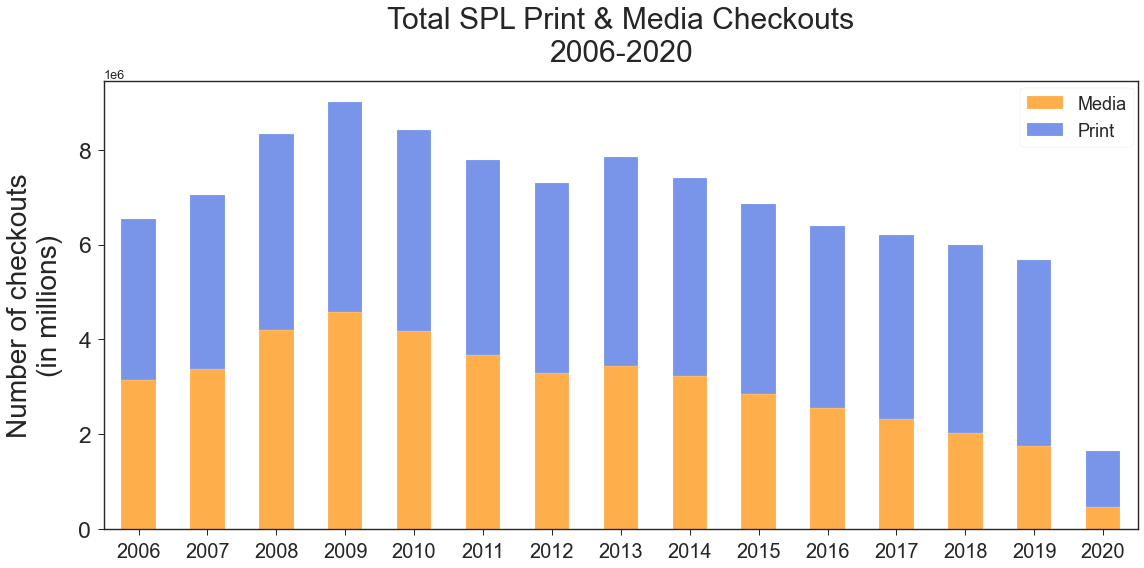

In [250]:
# plot the graph
mp_totals[1:].plot(kind='bar', stacked=True, 
    figsize=(16,8), color=['darkorange', 'royalblue'], 
    alpha=.70, fontsize=14)

# prettify the graph
plt.title('Total SPL Print & Media Checkouts\n2006-2020', 
          fontsize=30, pad=20)
plt.ylabel('Number of checkouts\n(in millions)', fontsize=28, labelpad=15)
plt.yticks(fontsize=23)
plt.xlabel('')
plt.xticks(fontsize=20, rotation=0)
plt.legend(['Media', 'Print'], facecolor='white', 
           framealpha=1, bbox_to_anchor=(1.005, 1.005), 
           fontsize=18)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/yearly_total_print_media_stackedbar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- It may be easier to visualize these numbers as a percentage of the total, which will also allow me to bring back in the data from 2005, since we aren't looking at the *total* checkouts.

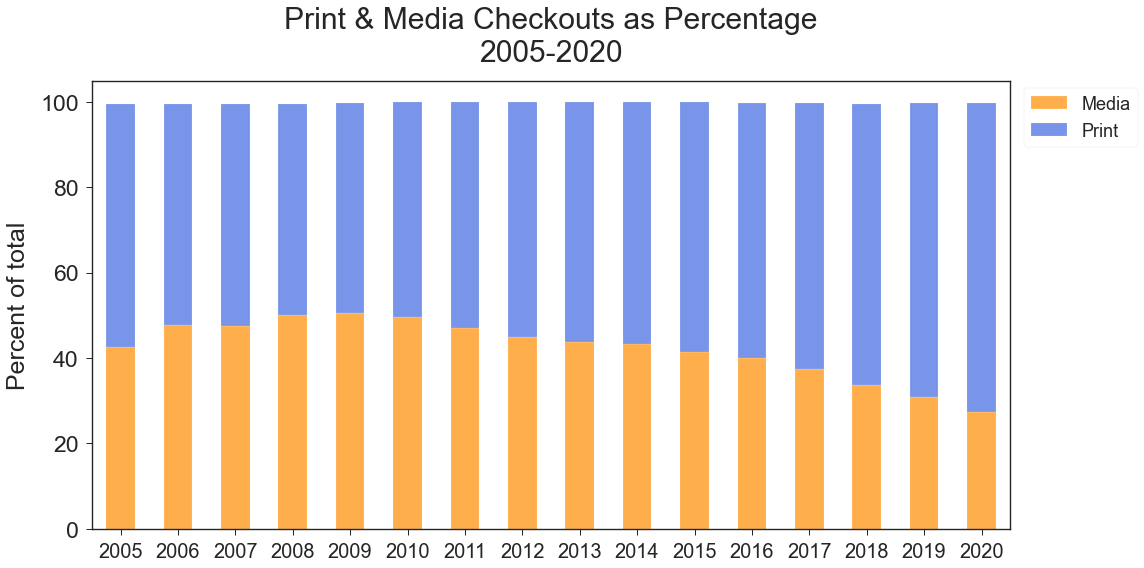

In [251]:
# plot the graph
mp_pct.plot(kind='bar', stacked=True, 
    figsize=(16,8), color=['darkorange', 'royalblue'], 
    alpha=.70, fontsize=14)

# prettify the graph
plt.title('Print & Media Checkouts as Percentage\n2005-2020', 
          fontsize=30, pad=20)
plt.ylabel('Percent of total', fontsize=25, labelpad=10)
plt.yticks(fontsize=23)
plt.xlabel('')
plt.xticks(fontsize=20, rotation=0)
plt.legend(['Media', 'Print'], facecolor='white', 
           framealpha=1, bbox_to_anchor=(1.005, 1.005), 
           fontsize=18)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/yearly_percent_print_media_stackedbar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- `Media` eclipses `Print` only during 2008 and 2009.
- `Media` checkouts (as a percentage of the total) decrease steadily year over year between 2010 and 2020, from around 50% of total checkouts in 2010 to 27.4% in 2020.

In [252]:
# total counts for print and media items
equip_pct = equip_totals / year_totals * 100
equip_pct

2005    0.000477
2006    0.000000
2007    0.000000
2008    0.000000
2009    0.000000
2010    0.000000
2011    0.000000
2012    0.000000
2013    0.000000
2014    0.000054
2015    0.035523
2016    0.145952
2017    0.198864
2018    0.374790
2019    0.307064
2020    0.300749
dtype: float64

In [75]:
please break code

SyntaxError: invalid syntax (<ipython-input-75-b8306b2d38fe>, line 1)

## GRAVEYARD

In [ ]:
df_counts.groupby(df_counts.index.year)['format_group_Media','format_group_Print'].agg('mean')

In [ ]:
df_full[df_full.format_group == 'Equipment'].head(10)

In [ ]:
%%time

# instantiate figure
plt.figure(figsize=(25,25))

cols = ['format_group', 'format_subgroup', 'category_group', 'age_group']

for i, col in enumerate(cols):
    
    # count values in the column
    col_counts = df_full[col].value_counts()

    # set dimension of plots
    nrows = 2
    ncols = 2

    # list of colors
    colors = ['steelblue', 'olivedrab', 'purple', 'darkorange']
    
    # plot
    plt.subplot(nrows, ncols, i+1)
    plt.title(f'{col.title().replace("_", " ")} for checkouts between 2005-2020', 
              fontsize=30, pad=15, x=0.5, y=1)
    plt.ylabel('Number of checkouts\n(in ten millions)', fontsize=28, labelpad=15)
    plt.xticks(rotation=55, fontsize=25)
    plt.yticks(fontsize=25)
    plt.bar(col_counts.index, col_counts.values, color=colors[i])
              
# # uncomment to save
# plt.savefig('charts/checkout_categories_bars.png', 
#             bbox_inches='tight', transparent=True)

In [ ]:
# proportion of end rhymes across movements
format_subgroup_dist = df_full.groupby('format_group').format_subgroup.\
    value_counts().unstack()

# plot the graph
format_subgroup_dist.plot(kind='bar', stacked=True, figsize=(9,7),
#                           color=['darkorange', 'royalblue'], 
                          alpha=.70, fontsize=14)

# prettify the graph
plt.title('Format of library checkouts\nin Seattle, 2005-2020', 
          fontsize=25, pad=15)
plt.suptitle('')
plt.xlabel('')
plt.ylabel('Number of checkouts', 
           fontsize=22, labelpad=10)

# plot the labels and and legends
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);
plt.legend(format_subgroup_dist.columns, facecolor='white', 
           framealpha=1, bbox_to_anchor=(1.01, 1.01), 
           fontsize=18)

# prepare to save and display
plt.tight_layout()
# # uncomment to save
# plt.savefig('charts/end_rhymes_stackedbar.png', 
#             bbox_inches='tight', transparent=True)

plt.show()

In [ ]:
please break code

In [ ]:
%%time

df_full.dropna(subset=['title'])[df_full.dropna(subset=['title']).title.str.contains('Uncataloged Folder or Bag')].title.value_counts()

In [ ]:
%%time

df_full[df_full.format_subgroup == 'Video Disc'].title.value_counts().head(25)

In [ ]:
df_full[df_full.title == 'SPL HotSpot connecting Seattle'].head(20)

In [ ]:
df_full[df_full.title == 'FlexTech Laptops'].head(20)

In [ ]:
df_full[df_full.title == 'Uncataloged Folder or Bag BAL'].head(20)

In [ ]:
df_full[df_full.title == 'In Building Device Checkout'].head(20)